# Time Series Fundamentals with Tensorflow


* Dataset Link -> https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

## Explaination

> The `BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv` file has roughly ~8yrs of bitcoin prices, calculated on a daily basis which amounts to `2787` samples.

> Typically a machine learning models requires `lots and lots of samples`.

> In `time series problems`, we will be often coming across datasets which do not have `sufficient or smaller number of samples`.

### Seasonality

> The frequency at which a time series value is collected is often referred to as `seasonality`. This is usually mesaured in number of samples per year. For example, collecting the price of Bitcoin once per day would result in a time series with a `seasonality of 365`. Time series data collected with different seasonality values often exhibit seasonal patterns (`e.g.` electricity demand behing higher in Summer months for air conditioning than Winter months)

In [1]:
!wget https://raw.githubusercontent.com/arghanath007/MachineLearning/main/helper_functions.py

--2022-09-08 12:04:11--  https://raw.githubusercontent.com/arghanath007/MachineLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26418 (26K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  25.80K  --.-KB/s    in 0s      

2022-09-08 12:04:11 (87.6 MB/s) - ‘helper_functions.py’ saved [26418/26418]



In [2]:
from helper_functions import model_check_point_callback, plot_loss_curves

## Getting the data

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-09-08 12:04:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.009s  

2022-09-08 12:04:15 (19.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [4]:
import pandas as pd

In [5]:
bitcoin_df= pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', parse_dates=["Date"], index_col=["Date"])
bitcoin_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


## Getting the Data

Link -> https://finance.yahoo.com/quote/BTC-USD/

In [6]:
!wget https://media.githubusercontent.com/media/arghanath007/MachineLearning/main/Time%20Series/BTC-USD.csv

--2022-09-08 12:04:15--  https://media.githubusercontent.com/media/arghanath007/MachineLearning/main/Time%20Series/BTC-USD.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74121 (72K) [text/plain]
Saving to: ‘BTC-USD.csv’

BTC-USD.csv         100%[===================>]  72.38K  --.-KB/s    in 0.004s  

2022-09-08 12:04:15 (18.0 MB/s) - ‘BTC-USD.csv’ saved [74121/74121]



In [7]:
bitcoin_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [8]:
bitcoin_updated_df= pd.read_csv('/content/BTC-USD.csv', parse_dates=["Date"], index_col=["Date"])
bitcoin_updated_df.head()

,Close
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [9]:
len(bitcoin_updated_df)

3262

In [10]:
len(bitcoin_df)

2787

In [11]:
bitcoin_updated_df.tail()

,Close
Date,
2022-09-01,20127.140625
2022-09-02,19969.771484
2022-09-03,19832.087891
2022-09-04,19986.712891
2022-09-05,19728.171875


In [12]:
bitcoin_df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


## DataFrame `Info`

In [13]:
bitcoin_updated_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3262 entries, 2013-10-01 to 2022-09-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3262 non-null   float64
dtypes: float64(1)
memory usage: 51.0 KB


In [14]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [15]:
bitcoin_updated_df.describe()

,Close
count,3262.000000
mean,11339.245271
std,15997.256465
min,108.584830
25%,577.478226
50%,5294.078369
75%,11098.937500
max,67566.828125


In [16]:
len(bitcoin_df) / 365

7.635616438356164

## Visualizing the dataset

In [17]:
bitcoin_updated_df[:5]

,Close
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [18]:
bitcoin_prices= pd.DataFrame(bitcoin_updated_df['Close']).rename(columns={"Close": "Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2022-09-01,20127.140625
2022-09-02,19969.771484
2022-09-03,19832.087891


In [19]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Price of Bitcon')

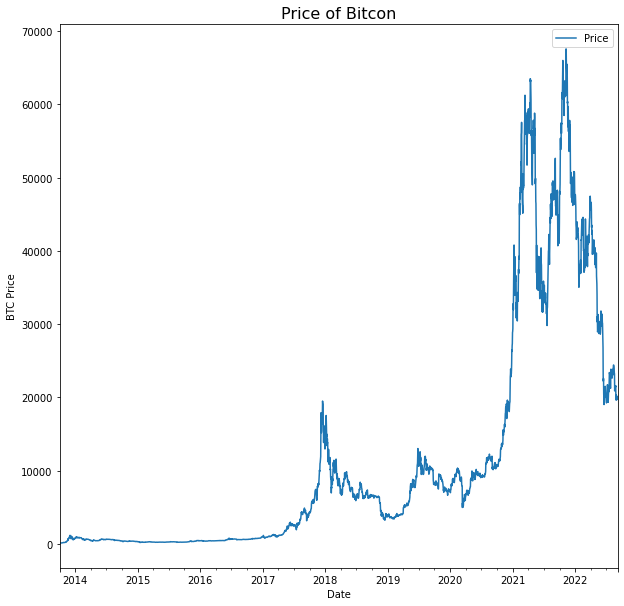

In [20]:
bitcoin_prices.plot(figsize=(10,10))
plt.ylabel("BTC Price")
plt.title("Price of Bitcon", fontsize=16)

In [21]:
bitcoin_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [22]:
bitcoin_updated_df.head()

,Close
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


## Importing the `bitcon prices csv file using python`

Link -> https://realpython.com/python-csv/

In [23]:
import csv
from datetime import datetime

timesteps=[]
btc_prices=[]

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
      timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
      btc_prices.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [24]:
import csv
from datetime import datetime

timesteps=[]
btc_prices=[]

with open('/content/BTC-USD.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
      timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
      btc_prices.append(float(line[1])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

## Visualizing the dataset

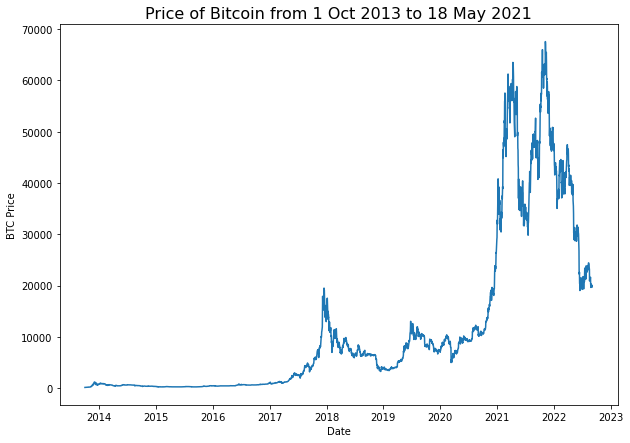

In [25]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_prices)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

## `Format Data Type 1`: Creating the train and test datasets from the time series dataset

In [26]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


### Creating the datasets the `wrong way`

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
timesteps= bitcoin_prices.index.to_numpy()
prices= bitcoin_prices['Price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [29]:
X_train, X_test, y_train, y_test= train_test_split(timesteps, prices, test_size=0.2, random_state=22)

len(X_train), len(X_test), X_train.shape, X_test.shape

(2609, 653, (2609,), (653,))

## Let's plot wrong train and test splits

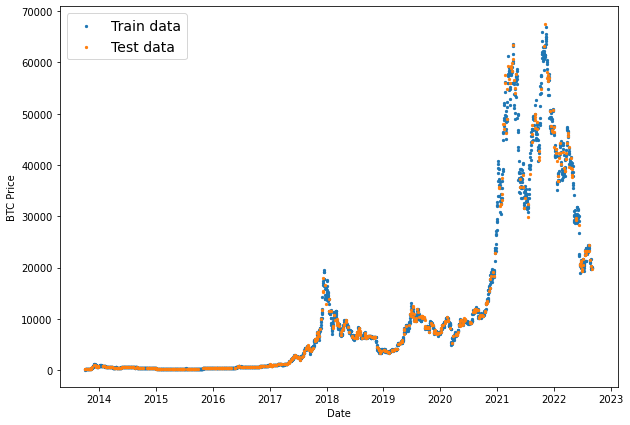

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Creating the datasets the `right way`

In [31]:
split_sizes= int(0.8 * len(prices))

X_train, y_train= timesteps[:split_sizes], prices[:split_sizes]

X_test, y_test= timesteps[split_sizes: ], prices[split_sizes: ]

len(X_train), len(X_test), len(X_train), len(X_test)

(2609, 653, 2609, 653)

### Let's plot `right` train and test splits

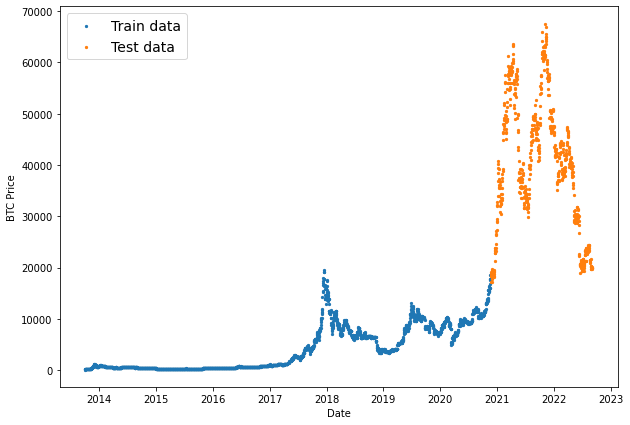

In [32]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

##Create a plotting function

> Plotting function to plot the datasets 


In [33]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, ylabel,format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  ylabel: The ylabel of the plot, string type.
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel(ylabel)
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

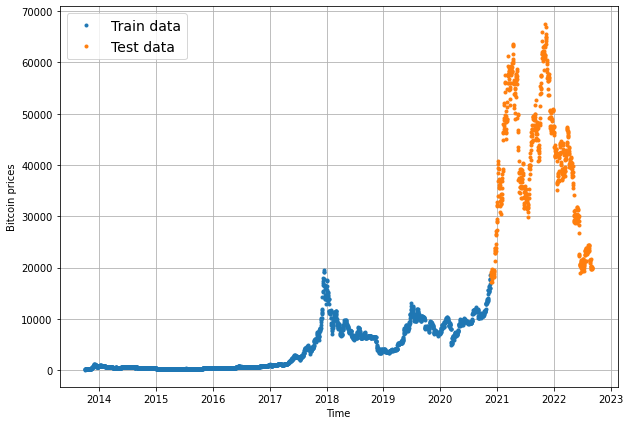

In [34]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test, values=y_test, label="Test data", ylabel="Bitcoin prices")

## Modelling Experiments

> Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, horizon and window.

* **Horizon** = `number of timesteps to predict into future`
* **Window size**= `number of timesteps from past used to predict horizon`

> For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

### Experiment List: 

| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA | 
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA | 
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA| 
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |


>To reiterate, as you can see, we can build many types of models for the data we're working with. But that doesn't mean that they'll perform well. Deep learning is a powerful technique but it doesn't always work. And as always, start with a simple model first and then add complexity as needed.



## `Model 0`: Naive Forecasting(baseline)

* Docs -> https://otexts.com/fpp2/simple-methods.html

In [35]:
y_test[:5]

array([18370.001953, 18364.121094, 19107.464844, 18732.121094,
       17150.623047])

### Creating a Naive forecast

In [36]:
naive_forecast= y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([18370.001953, 18364.121094, 19107.464844, 18732.121094,
        17150.623047, 17108.402344, 17717.414063, 18177.484375,
        19625.835938, 18802.998047]),
 array([20260.019531, 20041.738281, 19616.814453, 20297.994141,
        19796.808594, 20049.763672, 20127.140625, 19969.771484,
        19832.087891, 19986.712891]))

In [37]:
y_test[-10:]

array([20041.738281, 19616.814453, 20297.994141, 19796.808594,
       20049.763672, 20127.140625, 19969.771484, 19832.087891,
       19986.712891, 19728.171875])

### Plotting the Naive forecast

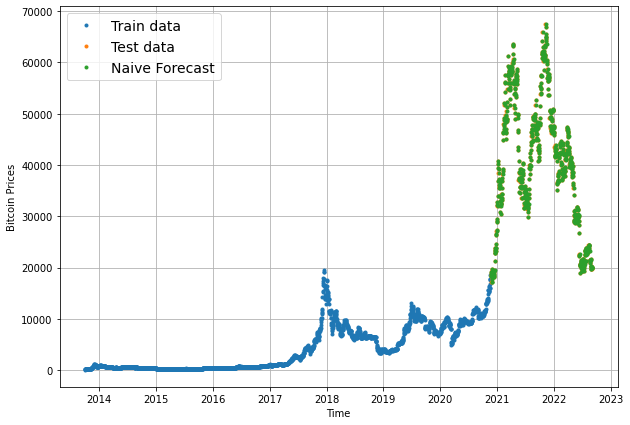

In [38]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test, values=y_test, label="Test data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive Forecast", ylabel="Bitcoin Prices")

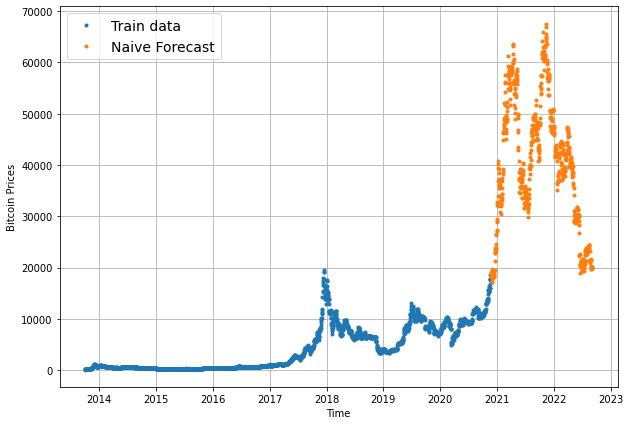

In [39]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin Prices")
# plot_time_series(timesteps=X_test, values=y_test, label="Test data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive Forecast", ylabel="Bitcoin Prices")

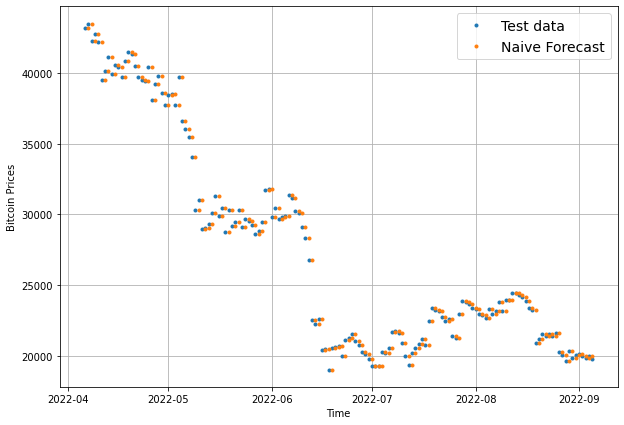

In [40]:
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test, values=y_test, label="Test data", start=500, ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive Forecast", start=500, ylabel="Bitcoin Prices")

## Evaluating a time series model

> Time series forecasting often involves predicting a number (in our case, the price of Bitcoin). And what kind of problem is predicting a number?

> **Regression**.

With this known, we can use regression evaluation metrics to evaluate our time series forecasts.

The main thing we will be evaluating is: **how do our model's predictions (`y_pred`) compare against the actual values (`y_true` or *ground truth values*)**? 

> 📖 **Resource:** We're going to be using several metrics to evaluate our different model's time series forecast accuracy. Many of them are sourced and explained mathematically and conceptually in [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html), I'd recommend reading through here for a more in-depth overview of what we're going to practice.

For all of the following metrics, **lower is better** (for example an MAE of 0 is better than an MAE 100).

### Scale-dependent errors

These are metrics which can be used to compare time series values and forecasts that are on the same scale.

For example, Bitcoin historical prices in USD veresus Bitcoin forecast values in USD.

| Metric | Details | Code |
| ----- | ----- | ----- |
| **MAE** (mean absolute error) | Easy to interpret (a forecast is X amount different from actual amount). Forecast methods which minimises the MAE will lead to forecasts of the median. | [`tf.keras.metrics.mean_absolute_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError) |
| **RMSE** (root mean square error) | Forecasts which minimise the RMSE lead to forecasts of the mean. | `tf.sqrt(`[`tf.keras.metrics.mean_square_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError)`)`|

### Percentage errors

Percentage errors do not have units, this means they can be used to compare forecasts across different datasets.

| **Metric** | **Details** | **Code** |
| ----- | ----- | ----- |
| **MAPE** (mean absolute percentage error) | Most commonly used percentage error. May explode (not work) if `y=0`. | [`tf.keras.metrics.mean_absolute_percentage_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MAPE) | 
| **sMAPE** (symmetric mean absolute percentage error) | Recommended not to be used by [Forecasting: Principles and Practice](https://otexts.com/fpp3/accuracy.html#percentage-errors), though it is used in forecasting competitions. | Custom implementation |

### Scaled errors

Scaled errors are an alternative to percentage errors when comparing forecast performance across different time series.

| **Metric** | **Details** | **Code** |
| ----- | ----- | ----- |
| **MASE** (mean absolute scaled error). | MASE equals one for the naive forecast (or very close to one). A forecast which performs better than the naïve should get <1 MASE. | See sktime's [`mase_loss()`](https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16) |

> 🤔 **Question:** There are so many metrics... which one should I pay most attention to? It's going to depend on your problem. However, since its ease of interpretation (you can explain it in a sentence to your grandma), MAE is often a very good place to start.

Since we're going to be evaluing a lot of models, let's write a function to help us calculate evaluation metrics on their forecasts.

In [41]:
import tensorflow as tf
import numpy as np

In [42]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [43]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9984741472055336

## Function to evaluate a time series model

In [44]:
def evaluate_preds(y_true, y_pred):
  """
    Description:
      Function to get the different evaluation metrics of a time series model.
    Parameters:
      y_true: The truth/actual values.(y_test)
      y_pred: The predicted values of the model(y_preds)
  """
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [45]:
naive_results= evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 1141.5067610828223,
 'mse': 2592967.393714534,
 'rmse': 1610.269354398367,
 'mape': 2.8639307796373665,
 'mase': 0.9984741472055336}

In [46]:
y_test.dtype

dtype('float64')

In [47]:
naive_forecast[-10:]

array([20260.019531, 20041.738281, 19616.814453, 20297.994141,
       19796.808594, 20049.763672, 20127.140625, 19969.771484,
       19832.087891, 19986.712891])

In [48]:
tf.reduce_mean(y_test).numpy()

40268.549866101064

In [49]:
tf.reduce_max(y_test).numpy(), tf.reduce_min(y_test).numpy()

(67566.828125, 17108.402344)

## `Format Data Type 2`: Windowing dataset

> For example for a univariate time series, windowing for one week (`window=7`) to predict the next single value (`horizon=1`) might look like:

```
Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

> Or for the price of Bitcoin, it'd look like:

```
Window for one week with the target of predicting the next day (Bitcoin prices)

[123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]
[125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]
[108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]
```


In [50]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [51]:
len(bitcoin_prices)

3262

In [52]:
len(btc_prices)

3262

In [53]:
btc_prices[:5]

[123.65499, 125.455, 108.58483, 118.67466, 121.33866]

## Global Values for `Horizon` and `Window_Size`

In [54]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

## Functuon to `label windowed data`

In [55]:
def get_labelled_windows(x, horizon=HORIZON):
  """
    Description:
      Creates labels for windowed dataset.
      E.g, 
        if horizon=1
        Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6], [7])
  """

  return x[:, :-horizon], x[:, -horizon:]

In [56]:
test_window, test_label= get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
test_window.numpy(), test_label.numpy()

(array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32), array([[7]], dtype=int32))

## Numpy indexing

* Docs -> https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing

### Steps for the function

1. Creates a window step of specific window size, for example: [[0, 1, 2, 3, 4, 5, 6, 7]]
2. Uses NumPy indexing to create a 2D of multiple window steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 6, 7, 8, 9]]
```

3. Uses the 2D array of multi-tuple window steps to index on a target series
4. Uses the `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon

In [57]:
np.expand_dims(np.arange(10), axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [58]:
np.expand_dims(np.arange(10) + 1, axis=0)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [59]:
prices[:5]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866])

In [60]:
len(prices)

3262

### Function to view numpy arrays as windows

In [61]:
def make_windows(x, window_size=WINDOW_SIZE, horizon= HORIZON):
  """
    Description:
      Turns a 1D array(Univariate) into a 2D array of sequential labelled windows of "window_size" with "horizon_size" labels. 

    Returns:
      It returns a tuple (windows, labels).
  """

  # 1 Creates a window step of specific window size
  window_step= np.expand_dims(np.arange(window_size + horizon), axis=0)

  # 2 Uses NumPy indexing to create a 2D of multiple window steps
  window_indexes= window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon-1)), axis=0).T # create 2D array of windows of size window_size

  # 3 Uses the 2D array of multuple window steps to index on a target series
  windowed_array= x[window_indexes]

  # 4 Uses the get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon
  windows, labels= get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [62]:
full_windows, full_labels= make_windows(prices)

len(full_windows), len(full_labels)

(3255, 3255)

In [63]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [64]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3:]} -> Label: {full_labels[i-3]}")

Window: [[20041.738281 19616.814453 20297.994141 19796.808594 20049.763672
  20127.140625 19969.771484]
 [19616.814453 20297.994141 19796.808594 20049.763672 20127.140625
  19969.771484 19832.087891]
 [20297.994141 19796.808594 20049.763672 20127.140625 19969.771484
  19832.087891 19986.712891]] -> Label: [19832.087891]
Window: [[19616.814453 20297.994141 19796.808594 20049.763672 20127.140625
  19969.771484 19832.087891]
 [20297.994141 19796.808594 20049.763672 20127.140625 19969.771484
  19832.087891 19986.712891]] -> Label: [19986.712891]
Window: [[20297.994141 19796.808594 20049.763672 20127.140625 19969.771484
  19832.087891 19986.712891]] -> Label: [19728.171875]


## Tensorflow build-in function which does the same as the above function `make_windows`

* Link -> https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [65]:
# full_dataset= tf.keras.preprocessing.timeseries_dataset_from_array(prices[:-10], prices[10:], sequence_length=10)
# full_dataset

In [66]:
# len(full_dataset)

In [67]:
# 23 *7

In [68]:
# for batch in full_dataset:
#   inputs, targets = batch
#   assert np.array_equal(inputs[0], prices[:10])  # First sequence: steps [0-9]
#   assert np.array_equal(targets[0], prices[10])  # Corresponding target: step 10
#   break


In [69]:
# len(inputs)

In [70]:
# len(targets)

In [71]:
# batch[1]

In [72]:
# inputs[:-1]

In [73]:
# targets[1:]

## Turning windows into training and test sets

In [74]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

## Funtion to make train/test splits for time series problems

In [75]:
def make_train_test_split(windows, labels, test_split=0.2):
  """
    Description: 
      Splits matching pairs of windows and labels into train and test split.

    Parameters: 
      windows -> The dataset(X)
      labels -> The labels of the dataset(y)
      test_split -> The ratio in which the dataset is to be split. Default is "0.2"

    Returns: 
      It is returned in this format -> train_windows, test_windows, train_labels, test_labels
  """

  split_size= int((1- test_split) * len(windows))
  train_windows= windows[:split_size]
  train_labels= labels[:split_size]

  test_windows= windows[split_size:]
  test_labels= labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [76]:
train_windows, test_windows, train_labels, test_labels= make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2604, 651, 2604, 651)

In [77]:
len(full_windows) * 0.8

2604.0

In [78]:
train_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [79]:
train_labels[:5]

array([[123.033  ],
       [124.049  ],
       [125.96116],
       [125.27966],
       [125.9275 ]])

In [80]:
test_windows[:5]

array([[17645.40625 , 17804.005859, 17817.089844, 18621.314453,
        18642.232422, 18370.001953, 18364.121094],
       [17804.005859, 17817.089844, 18621.314453, 18642.232422,
        18370.001953, 18364.121094, 19107.464844],
       [17817.089844, 18621.314453, 18642.232422, 18370.001953,
        18364.121094, 19107.464844, 18732.121094],
       [18621.314453, 18642.232422, 18370.001953, 18364.121094,
        19107.464844, 18732.121094, 17150.623047],
       [18642.232422, 18370.001953, 18364.121094, 19107.464844,
        18732.121094, 17150.623047, 17108.402344]])

In [81]:
test_labels[:5]

array([[19107.464844],
       [18732.121094],
       [17150.623047],
       [17108.402344],
       [17717.414063]])

In [82]:
train_windows.shape

(2604, 7)

### Check to see if same (accounting for horizon and window size)

In [83]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

In [84]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            monitor='val_loss',
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [85]:
train_windows.dtype

dtype('float64')

## `Model 1`: Dense model(window=7, horizon=1)

### Steps:


* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs


In [86]:
import tensorflow as tf
from tensorflow.keras import layers

In [87]:
inputs= layers.Input(shape=(WINDOW_SIZE,), dtype="float64", name="model_1_inputs")
x= layers.Dense(128, activation='relu')(inputs)
outputs= layers.Dense(HORIZON, activation='linear')(x)
model_1= tf.keras.Model(inputs, outputs, name="model_1_dense")

model_1.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

In [88]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1_inputs (InputLayer)  [(None, 7)]              0         
                                                                 
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [89]:
history_model_1= model_1.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name='model_1_dense', save_path='model_experiments')])

Epoch 1/100
21/21 [==============================] - 2s 49ms/step - loss: 1683.1031 - mae: 1683.1031 - mse: 9011892.0000 - val_loss: 6178.3608 - val_mae: 6178.3608 - val_mse: 48666468.0000
Epoch 2/100
21/21 [==============================] - 0s 22ms/step - loss: 359.8203 - mae: 359.8203 - mse: 435444.3438 - val_loss: 2033.0870 - val_mae: 2033.0870 - val_mse: 7304255.5000
Epoch 3/100
21/21 [==============================] - 0s 21ms/step - loss: 210.2945 - mae: 210.2945 - mse: 187763.3281 - val_loss: 1969.2400 - val_mae: 1969.2400 - val_mse: 6857611.0000
Epoch 4/100
21/21 [==============================] - 0s 21ms/step - loss: 198.2500 - mae: 198.2500 - mse: 178905.5312 - val_loss: 1894.9387 - val_mae: 1894.9387 - val_mse: 6359514.0000
Epoch 5/100
21/21 [==============================] - 0s 21ms/step - loss: 193.5067 - mae: 193.5067 - mse: 172211.9844 - val_loss: 1849.9481 - val_mae: 1849.9481 - val_mse: 6057220.0000
Epoch 6/100
21/21 [==============================] - 0s 21ms/step - los

In [90]:
naive_results

{'mae': 1141.5067610828223,
 'mse': 2592967.393714534,
 'rmse': 1610.269354398367,
 'mape': 2.8639307796373665,
 'mase': 0.9984741472055336}

### Evaluating the model

In [91]:
model_1.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1150.6619 - mae: 1150.6619 - mse: 2617045.5000


[1150.661865234375, 1150.661865234375, 2617045.5]

In [92]:
model_1_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_1_dense/')

In [93]:
model_1_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1150.6619 - mae: 1150.6619 - mse: 2617045.5000


[1150.661865234375, 1150.661865234375, 2617045.5]

In [94]:
# model_1_pred_preds= model_1_checkpoint.predict(test_windows)
# model_1_preds= tf.argmax(model_1_pred_preds, axis=0)
# model_1_preds[:5]

In [95]:
# model_1_results= evaluate_preds(test_labels, model_1_preds)
# model_1_results

## Making a function to return the predictions of a model

In [96]:
def make_preds(model, input_data):
  """
  Description:
    Uses model to make predictions on input_data.

  Parameters:
    model: trained model 
    input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.cast(tf.squeeze(forecast), dtype="float64") # return 1D array of predictions

In [97]:
model_1_preds= make_preds(model_1_checkpoint, test_windows)
model_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([18410.95898438, 19030.37890625, 18823.08398438, 17360.25585938,
       17089.171875  ])>

In [98]:
model_1_results= evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 1150.661884361943,
 'mse': 2617045.4913400547,
 'rmse': 1617.7284974123609,
 'mape': 2.892959959545304,
 'mase': 1.00594077054125}

In [99]:
naive_results

{'mae': 1141.5067610828223,
 'mse': 2592967.393714534,
 'rmse': 1610.269354398367,
 'mape': 2.8639307796373665,
 'mase': 0.9984741472055336}

## Autocorrelation time series

* Link -> https://otexts.com/fpp2/autocorrelation.html#

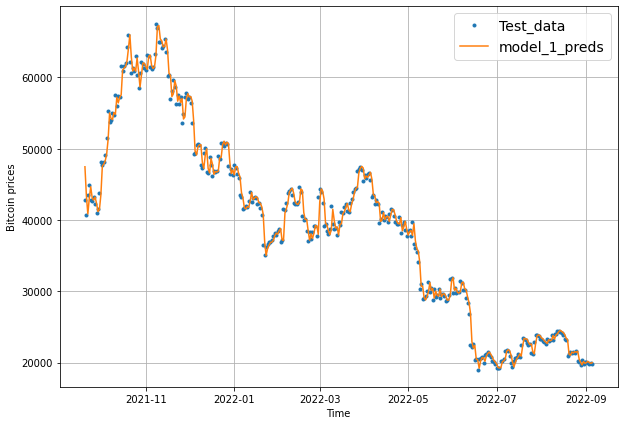

In [100]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds", ylabel="Bitcoin prices")

## `Model 2`: Dense model(window=30, horizon=1)

### Steps:


* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs


In [101]:
WINDOW_SIZE, HORIZON

(7, 1)

In [102]:
WINDOW_SIZE= 30

inputs= layers.Input(shape=(WINDOW_SIZE,), dtype="float32", name="model_2_inputs")
x= layers.Dense(128, activation="relu")(inputs)
outputs= layers.Dense(HORIZON, activation='linear')(x)
model_2= tf.keras.Model(inputs, outputs, name="model_2_dense")

In [103]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2_inputs (InputLayer)  [(None, 30)]             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [104]:
WINDOW_SIZE, HORIZON

(30, 1)

## Creating the new windows datasets

In [105]:
new_30_windows, new_30_labels= make_windows(prices,WINDOW_SIZE, HORIZON)

In [106]:
len(new_30_windows), len(new_30_labels)

(3232, 3232)

## Splitting the new windows datasets

In [107]:
train_windows, test_windows, train_labels, test_labels= make_train_test_split(new_30_windows, new_30_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2585, 647, 2585, 647)

In [108]:
train_windows[:3], train_labels[:3], train_windows.shape

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [109]:
model_2.compile(loss="mse", optimizer= tf.keras.optimizers.Adam(), metrics=['mse','mae'])

history_2= model_2.fit(train_windows, train_labels, epochs=100, batch_size=128,validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint('model_2_dense')])

Epoch 1/100
21/21 [==============================] - 1s 27ms/step - loss: 1923492.8750 - mse: 1923492.8750 - mae: 777.2845 - val_loss: 14246301.0000 - val_mse: 14246301.0000 - val_mae: 2969.2432
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 416542.5625 - mse: 416542.5625 - mae: 333.6658 - val_loss: 18394562.0000 - val_mse: 18394562.0000 - val_mae: 3410.6143
Epoch 3/100
21/21 [==============================] - 0s 20ms/step - loss: 299526.3750 - mse: 299526.3750 - mae: 274.2446 - val_loss: 10028288.0000 - val_mse: 10028288.0000 - val_mae: 2449.9932
Epoch 4/100
21/21 [==============================] - 1s 38ms/step - loss: 234460.9219 - mse: 234460.9219 - mae: 233.8768 - val_loss: 7997605.5000 - val_mse: 7997605.5000 - val_mae: 2145.2334
Epoch 5/100
21/21 [==============================] - 0s 21ms/step - loss: 201074.4375 - mse: 201074.4375 - mae: 211.0889 - val_loss: 7291611.0000 - val_mse: 7291611.0000 - val_mae: 2071.1938
Epoch 6/100
21/21 [===================

### Evaluating the model

In [110]:
model_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 4466006.5000 - mse: 4466006.5000 - mae: 1654.1207


[4466006.5, 4466006.5, 1654.1207275390625]

In [111]:
model_2_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_2_dense/')
model_2_checkpoint

In [112]:
model_2_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 2911676.2500 - mse: 2911676.2500 - mae: 1237.2748


[2911676.25, 2911676.25, 1237.2747802734375]

### Making prediction on the model

In [113]:
model_2_preds= make_preds(model_2_checkpoint, test_windows)
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([17316.15820312, 17675.45117188, 18079.47070312, 19232.40039062,
       18993.796875  ])>

In [114]:
model_2_results= evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 1237.274696310085,
 'mse': 2911675.8366241595,
 'rmse': 1706.3633366385247,
 'mape': 3.1051734907409476,
 'mase': 1.078787882115896}

In [115]:
model_1_results

{'mae': 1150.661884361943,
 'mse': 2617045.4913400547,
 'rmse': 1617.7284974123609,
 'mape': 2.892959959545304,
 'mase': 1.00594077054125}

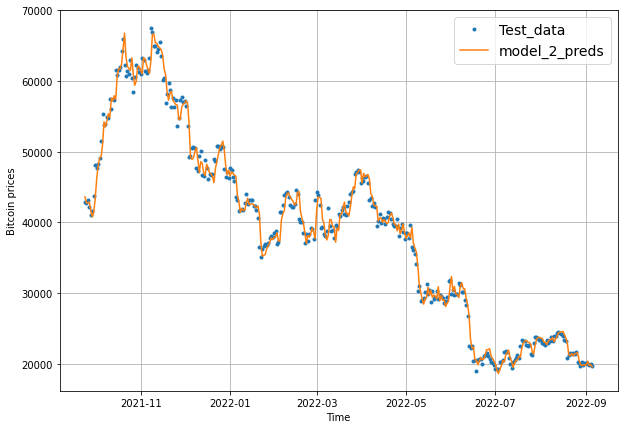

In [116]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds", ylabel="Bitcoin prices")

In [117]:
WINDOW_SIZE, HORIZON

(30, 1)

## `Model 3`: Dense model(window=30, horizon=7)

### Steps:


* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs


## Creating the new windows datasets

In [118]:
WINDOW_SIZE= 30
HORIZON= 7
new_30_7_windows, new_30_7_labels= make_windows(prices,WINDOW_SIZE, HORIZON)

In [119]:
len(new_30_7_windows), len(new_30_7_labels)

(3226, 3226)

## Splitting the new windows datasets

In [120]:
train_windows, test_windows, train_labels, test_labels=make_train_test_split(new_30_7_windows, new_30_7_labels)

In [121]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2580, 646, 2580, 646)

In [122]:
train_windows[:3], train_labels[:3], train_windows.shape

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [123]:
2276 + 569

2845

### Creating the model

In [124]:
WINDOW_SIZE, HORIZON

(30, 7)

In [125]:
inputs= layers.Input(shape=(30, ), dtype="float32", name="model_3_inputs")
x= layers.Dense(128, activation="relu")(inputs)
outputs= layers.Dense(HORIZON, activation="linear")(x)

model_3= tf.keras.Model(inputs, outputs, name="model_3_dense")

In [126]:
model_3.summary()

Model: "model_3_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3_inputs (InputLayer)  [(None, 30)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 7)                 903       
                                                                 
Total params: 4,871
Trainable params: 4,871
Non-trainable params: 0
_________________________________________________________________


In [127]:
model_3.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(), metrics=["mae", "mse"])

history_3= model_3.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint('model_3_dense')])

Epoch 1/100
21/21 [==============================] - 2s 57ms/step - loss: 1765.6223 - mae: 1765.6223 - mse: 14176078.0000 - val_loss: 6134.6196 - val_mae: 6134.6196 - val_mse: 61722984.0000
Epoch 2/100
21/21 [==============================] - 1s 31ms/step - loss: 585.9261 - mae: 585.9261 - mse: 1322843.5000 - val_loss: 4196.7222 - val_mae: 4196.7222 - val_mse: 29720278.0000
Epoch 3/100
21/21 [==============================] - 0s 23ms/step - loss: 431.0008 - mae: 431.0008 - mse: 764919.6875 - val_loss: 3684.4949 - val_mae: 3684.4949 - val_mse: 23550070.0000
Epoch 4/100
21/21 [==============================] - 0s 19ms/step - loss: 389.9738 - mae: 389.9738 - mse: 624470.2500 - val_loss: 3508.1331 - val_mae: 3508.1331 - val_mse: 21274500.0000
Epoch 5/100
21/21 [==============================] - 0s 22ms/step - loss: 367.1150 - mae: 367.1150 - mse: 557248.5000 - val_loss: 3384.6851 - val_mae: 3384.6851 - val_mse: 20066292.0000
Epoch 6/100
21/21 [==============================] - 0s 3ms/step 

### Evaluating the model

In [128]:
model_3.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 2711.5869 - mae: 2711.5869 - mse: 12980268.0000


[2711.5869140625, 2711.5869140625, 12980268.0]

In [129]:
model_3_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_3_dense/')
model_3_checkpoint

In [130]:
model_3_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 2488.3979 - mae: 2488.3979 - mse: 11602659.0000


[2488.39794921875, 2488.39794921875, 11602659.0]

In [131]:
model_3_preds= make_preds(model_3_checkpoint, test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float64, numpy=
array([[18346.30664062, 18716.81445312, 18752.16601562, 18554.9609375 ,
        19021.08789062, 18633.1796875 , 18694.41015625],
       [18583.55859375, 18472.24023438, 18558.19921875, 18651.1796875 ,
        18931.86523438, 18690.91210938, 18281.92382812],
       [18983.83007812, 19139.12695312, 18692.98046875, 19191.37890625,
        19072.16015625, 18929.26757812, 18546.08984375],
       [18971.00976562, 19103.8125    , 18765.92578125, 18718.66210938,
        18892.74609375, 18940.67773438, 18751.13085938],
       [17629.52929688, 18072.52148438, 17663.828125  , 17746.07421875,
        18069.41992188, 17779.34960938, 17628.75585938]])>

In [132]:
test_labels.shape

(646, 7)

In [133]:
tf.squeeze(test_labels).shape

TensorShape([646, 7])

In [134]:
model_3_preds.shape

TensorShape([646, 7])

In [135]:
# model_3_results_old= evaluate_preds(tf.squeeze(test_labels), model_3_preds)
# model_3_results_old

## Updated `evaluate_preds` function to calculate/work with multiple shapes of data.

In [136]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  # y_true = tf.cast(y_true, dtype=tf.float32)
  # y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean, ("aggregating" means "condensing").
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

### Making Predictions with the model

In [137]:
model_3_results= evaluate_preds(test_labels, model_3_preds)
model_3_results

{'mae': 2488.397975359216,
 'mse': 11602658.957918324,
 'rmse': 2854.43580190817,
 'mape': 6.2284662137616404,
 'mase': 2.164106396751461}

In [138]:
model_2_results

{'mae': 1237.274696310085,
 'mse': 2911675.8366241595,
 'rmse': 1706.3633366385247,
 'mape': 3.1051734907409476,
 'mase': 1.078787882115896}

In [139]:
model_1_results

{'mae': 1150.661884361943,
 'mse': 2617045.4913400547,
 'rmse': 1617.7284974123609,
 'mape': 2.892959959545304,
 'mase': 1.00594077054125}

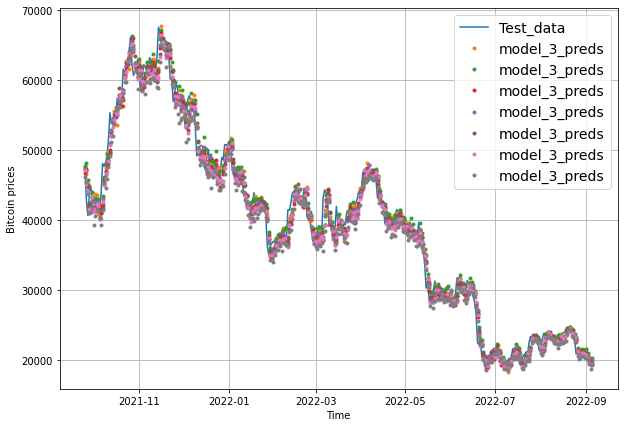

In [140]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test_data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds", ylabel="Bitcoin prices")

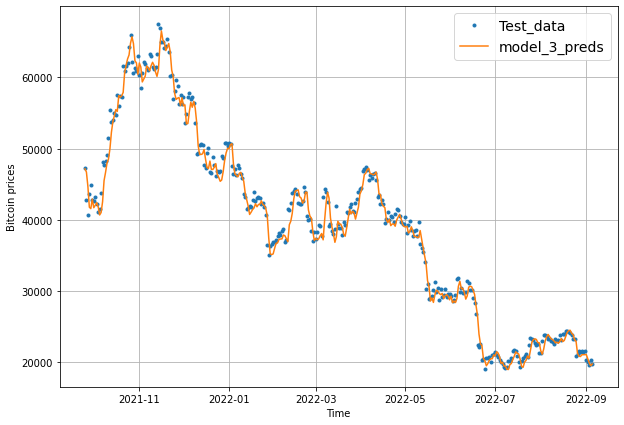

In [141]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="model_3_preds", ylabel="Bitcoin prices")

In [142]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float64, numpy=
array([[18346.30664062, 18716.81445312, 18752.16601562, 18554.9609375 ,
        19021.08789062, 18633.1796875 , 18694.41015625],
       [18583.55859375, 18472.24023438, 18558.19921875, 18651.1796875 ,
        18931.86523438, 18690.91210938, 18281.92382812],
       [18983.83007812, 19139.12695312, 18692.98046875, 19191.37890625,
        19072.16015625, 18929.26757812, 18546.08984375],
       [18971.00976562, 19103.8125    , 18765.92578125, 18718.66210938,
        18892.74609375, 18940.67773438, 18751.13085938],
       [17629.52929688, 18072.52148438, 17663.828125  , 17746.07421875,
        18069.41992188, 17779.34960938, 17628.75585938]])>

## Comparing the `4 Dense models`

In [143]:
dense_models= pd.DataFrame({"naive_model": naive_results, "model_1": model_1_results, "model_2": model_2_results, "model_3": model_3_results}, index=["mae"])
# dense_models=dense_models.T
dense_models

,naive_model,model_1,model_2,model_3
mae,1141.506761,1150.661884,1237.274696,2488.397975


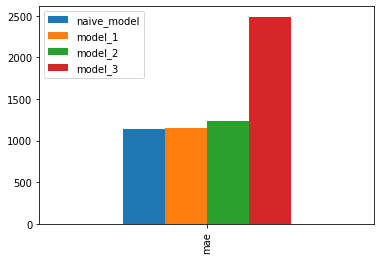

In [144]:
dense_models.plot(kind="bar");

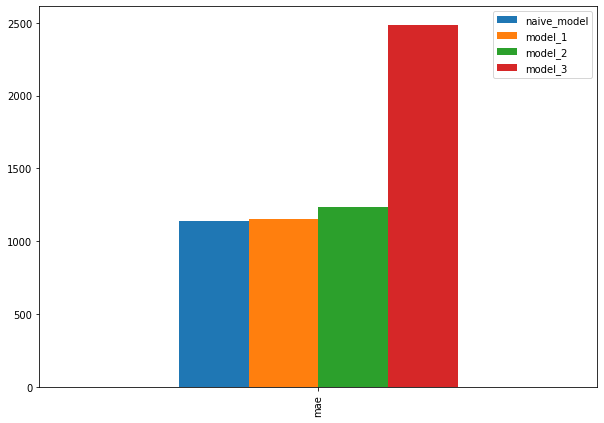

In [145]:
dense_models.plot(figsize=(10,7), kind="bar");

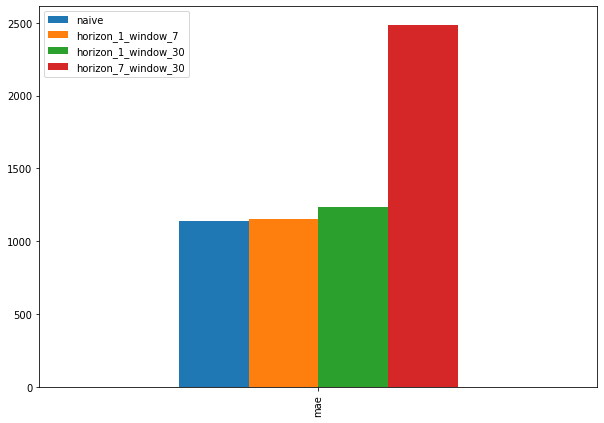

In [146]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [147]:
dense_models= pd.DataFrame({"naive_model": naive_results, "model_1": model_1_results, "model_2": model_2_results, "model_3": model_3_results}, index=["mae"])
dense_models=dense_models.T
dense_models

,mae
naive_model,1141.506761
model_1,1150.661884
model_2,1237.274696
model_3,2488.397975


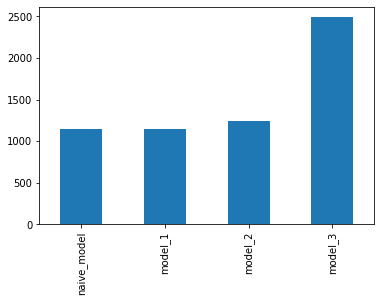

In [148]:
dense_models["mae"].plot(kind="bar");

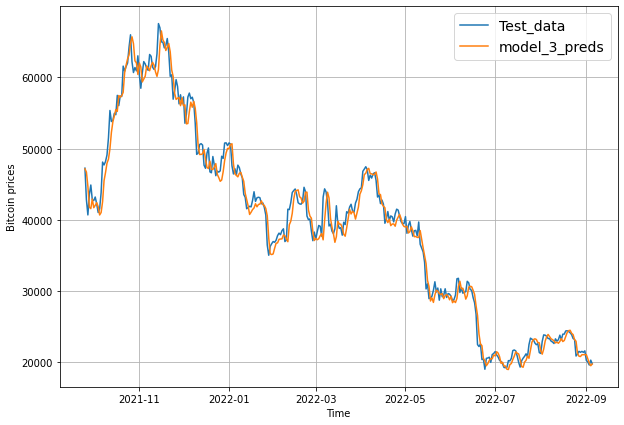

In [149]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test_data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="model_3_preds", ylabel="Bitcoin prices")

## AutoCorrelation for time series Problems

* Link -> https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424



## `Model 4`: Conv1D 

### Input and Output shapes of a Conv1D layer

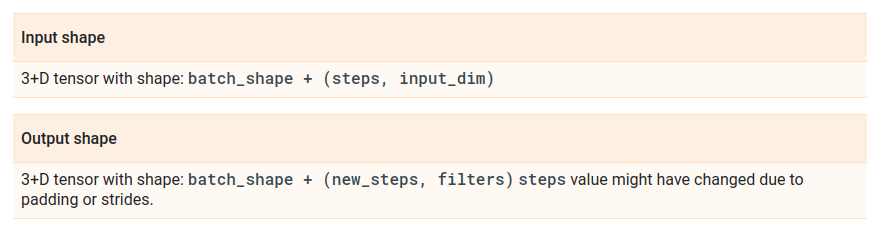


* Link -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

> It requires a `3D shaped` dataset but the time series dataset is in `1D` format, we have to format it in `3D` to pass to the Conv1D layer.

In [150]:
WINDOWS_SIZE =7
HORIZON=1 

In [151]:
WINDOWS_SIZE, HORIZON

(7, 1)

In [152]:
full_windows, full_labels= make_windows(prices, window_size=WINDOWS_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3255, 3255)

In [153]:
train_windows, test_windows, train_labels, test_labels= make_train_test_split(full_windows, full_labels)
len(train_windows), len(train_labels)

(2604, 2604)

In [154]:
train_windows[0].shape

(7,)

In [155]:
example= tf.constant(train_windows[0])
example

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

### Changing the `input_dims` from `1D` to `2D` 

In [156]:
expand_dims_layer= layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # Add an extra dimension to the `input_dims`

In [157]:
expand_dims_layer(example).shape

TensorShape([7, 1])

In [158]:
example.shape

TensorShape([7])

In [159]:
example

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [160]:
expand_dims_layer(example)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

### Creating the Conv1D model

In [161]:
inputs= layers.Input(shape=(WINDOWS_SIZE, ), dtype="float32", name="model_4_inputs")
expand_dims_layer= layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x= layers.Conv1D(filters= 128, kernel_size= WINDOWS_SIZE, padding="causal", activation="relu",name="conv_1d_layer_1")(expand_dims_layer)
x= layers.MaxPool1D(5, padding="same", name="max_pooling1d_1")(x)
x= layers.Conv1D(filters= 128, kernel_size= WINDOWS_SIZE, padding="causal", activation="relu",name="conv_1d_layer_2")(x)
x= layers.MaxPool1D(5, padding="same", name="max_pooling1d_2")(x)
x= layers.Conv1D(filters= 128, kernel_size= WINDOWS_SIZE, padding="causal", activation="relu",name="conv_1d_layer_3")(x)
x= layers.MaxPool1D(5, padding="same", name="max_pooling1d_3")(x)
outputs= layers.Dense(HORIZON, activation="linear", name="output_layer")(x)

model_4= tf.keras.Model(inputs, outputs, name="model_4_conv1d")

In [162]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_4_inputs (InputLayer)  [(None, 7)]              0         
                                                                 
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv_1d_layer_1 (Conv1D)    (None, 1, 128)            6400      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 conv_1d_layer_2 (Conv1D)    (None, 1, 128)            114816    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 128)           0         
 1D)                                                

In [163]:
model_4.compile(loss="mae", optimizer= tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_4= model_4.fit(train_windows, train_labels, batch_size=128, epochs=100, validation_data=(test_windows, test_labels,), callbacks=[create_model_checkpoint('model_4_conv1d')])

Epoch 1/100
21/21 [==============================] - 2s 66ms/step - loss: 2713.4941 - mae: 2713.4941 - mse: 18682446.0000 - val_loss: 10132.9395 - val_mae: 10132.9395 - val_mse: 121321672.0000
Epoch 2/100
21/21 [==============================] - 1s 55ms/step - loss: 450.1010 - mae: 450.1010 - mse: 660361.0625 - val_loss: 2529.5200 - val_mae: 2529.5200 - val_mse: 10480356.0000
Epoch 3/100
21/21 [==============================] - 2s 78ms/step - loss: 250.6636 - mae: 250.6636 - mse: 253467.3594 - val_loss: 2056.2778 - val_mae: 2056.2778 - val_mse: 7527406.0000
Epoch 4/100
21/21 [==============================] - 1s 60ms/step - loss: 217.5292 - mae: 217.5292 - mse: 211201.0625 - val_loss: 2048.0112 - val_mae: 2048.0112 - val_mse: 7376609.5000
Epoch 5/100
21/21 [==============================] - 1s 60ms/step - loss: 215.0662 - mae: 215.0662 - mse: 206917.5781 - val_loss: 2046.8602 - val_mae: 2046.8602 - val_mse: 7452379.5000
Epoch 6/100
21/21 [==============================] - 0s 11ms/step 

In [164]:
model_4.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1349.1962 - mae: 1349.1962 - mse: 3302602.2500


[1349.1961669921875, 1349.1961669921875, 3302602.25]

In [165]:
model_4_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_4_conv1d')

In [166]:
model_4_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1153.2397 - mae: 1153.2397 - mse: 2633972.0000


[1153.23974609375, 1153.23974609375, 2633972.0]

In [167]:
model_4_preds= make_preds(model_4_checkpoint, test_windows)
model_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([18388.14648438, 19034.32421875, 18841.33398438, 17387.23828125,
       17061.88085938])>

In [168]:
model_4_results= evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 1153.2397063375577,
 'mse': 2633972.4749795594,
 'rmse': 1622.951778390091,
 'mape': 2.90163621047417,
 'mase': 1.0081943745405741}

In [169]:
model_2_results

{'mae': 1237.274696310085,
 'mse': 2911675.8366241595,
 'rmse': 1706.3633366385247,
 'mape': 3.1051734907409476,
 'mase': 1.078787882115896}

In [170]:
model_1_results

{'mae': 1150.661884361943,
 'mse': 2617045.4913400547,
 'rmse': 1617.7284974123609,
 'mape': 2.892959959545304,
 'mase': 1.00594077054125}

## Hyper-parameter Tuning

* Link -> https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams

### Loading the Tensorboard notebook extension

In [171]:
# %load_ext tensorboard

In [172]:
# from tensorboard.plugins.hparams import api as hp

In [173]:

# inputs= layers.Input(shape=(WINDOWS_SIZE, ), dtype="float32", name="model_4_inputs")
# expand_dims_layer= layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# # x= layers.Conv1D(filters= 128, kernel_size= WINDOWS_SIZE, padding="causal", activation="relu",name="conv_1d_layer_1")(expand_dims_layer)
# # x= layers.MaxPool1D(5, padding="same", name="max_pooling1d_1")(x)

# x= layers.Conv1D(hp.HParam['filters'], hp.HParam['kernel_size'], hp.HParam['padding'], activation="relu",name="conv_1d_layer_1")(expand_dims_layer)
# x= layers.MaxPool1D(hp.HParam['pool_size'], hp.HParam['padding'], name="max_pooling1d")(x)

# outputs= layers.Dense(HORIZON, activation="linear", name="output_layer")(x)

# model_4_hparams= tf.keras.Model(inputs, outputs, name="model_4_conv1d_hyperparameters")


# model_4_hparams.compile(optimizer= hp.hparams['optimizer'], loss='mae', accuracy=['mae', 'mse'])

# history_model_4_hparams= model_4_hparams.fit(train_windows, train_labels, batch_size=128, epochs=100, validation_data=(test_windows, test_labels,), callbacks=[create_model_checkpoint('model_4_conv1d')])

## `Model 5`: RNN(LSTM)


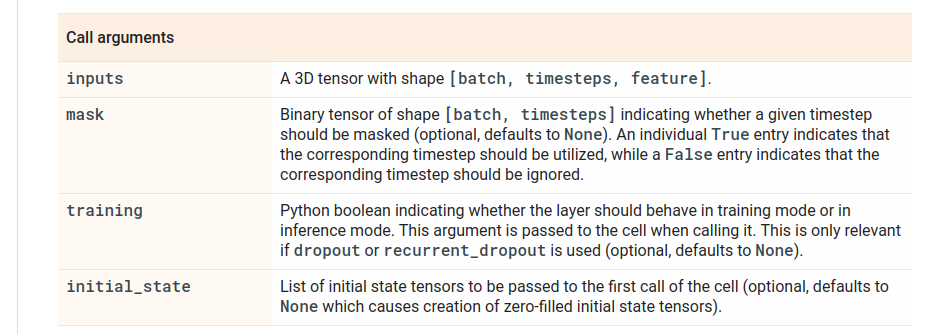


* Link -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

In [174]:
inputs= layers.Input(shape=(WINDOWS_SIZE, ), dtype="float32", name="model_5_inputs")
expand_dims_layer= layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x= layers.LSTM(128, activation='relu')(expand_dims_layer)
x= layers.Dense(32, activation="relu")(x)
outputs= layers.Dense(HORIZON, activation="linear", name="output_layer")(x)

model_5= tf.keras.Model(inputs, outputs, name="model_5_lstm")

In [175]:
model_5.summary()

Model: "model_5_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_5_inputs (InputLayer)  [(None, 7)]              0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 73,793
Trainable params: 73,793
Non-trainable params: 0
_________________________________________________________________


In [176]:
model_5.compile(loss="mae", optimizer= tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_5= model_5.fit(train_windows, train_labels, batch_size=128, epochs=100, validation_data=(test_windows, test_labels,), callbacks=[create_model_checkpoint('model_5_lstm')])

Epoch 1/100
12/21 [================>.............] - ETA: 0s - loss: 4050.5361 - mae: 4050.5361 - mse: 33627104.0000 

21/21 [==============================] - 3s 96ms/step - loss: 3766.8745 - mae: 3766.8745 - mse: 29733660.0000 - val_loss: 29084.4766 - val_mae: 29084.4766 - val_mse: 929477888.0000
Epoch 2/100
20/21 [===========================>..] - ETA: 0s - loss: 1668.3386 - mae: 1668.3386 - mse: 7396514.5000 

21/21 [==============================] - 2s 108ms/step - loss: 1643.9055 - mae: 1643.9055 - mse: 7273835.5000 - val_loss: 3703.9600 - val_mae: 3703.9600 - val_mse: 20858102.0000
Epoch 3/100
11/21 [==============>...............] - ETA: 0s - loss: 406.7681 - mae: 406.7681 - mse: 532452.7500

21/21 [==============================] - 2s 88ms/step - loss: 340.4320 - mae: 340.4320 - mse: 402943.2500 - val_loss: 2178.2095 - val_mae: 2178.2095 - val_mse: 8318770.0000
Epoch 4/100
12/21 [================>.............] - ETA: 0s - loss: 252.5437 - mae: 252.5437 - mse: 273615.8125

21/21 [==============================] - 2s 89ms/step - loss: 241.5561 - mae: 241.5561 - mse: 245111.1094 - val_loss: 2120.4709 - val_mae: 2120.4709 - val_mse: 8047136.0000
Epoch 5/100
19/21 [==========================>...] - ETA: 0s - loss: 224.5798 - mae: 224.5798 - mse: 227792.1875

21/21 [==============================] - 2s 90ms/step - loss: 223.4213 - mae: 223.4213 - mse: 222469.1875 - val_loss: 2106.9094 - val_mae: 2106.9094 - val_mse: 7939619.5000
Epoch 6/100
21/21 [==============================] - ETA: 0s - loss: 219.3916 - mae: 219.3916 - mse: 215976.5312

21/21 [==============================] - 2s 114ms/step - loss: 219.3916 - mae: 219.3916 - mse: 215976.5312 - val_loss: 2090.0229 - val_mae: 2090.0229 - val_mse: 7810026.0000
Epoch 7/100
11/21 [==============>...............] - ETA: 0s - loss: 218.4856 - mae: 218.4856 - mse: 228314.7031

21/21 [==============================] - 2s 89ms/step - loss: 214.3111 - mae: 214.3111 - mse: 208019.1875 - val_loss: 1795.3586 - val_mae: 1795.3586 - val_mse: 5881910.5000
Epoch 8/100
21/21 [==============================] - 0s 6ms/step - loss: 219.0882 - mae: 219.0882 - mse: 196098.4375 - val_loss: 2323.7588 - val_mae: 2323.7588 - val_mse: 9371939.0000
Epoch 9/100
21/21 [==============================] - 0s 7ms/step - loss: 214.8526 - mae: 214.8526 - mse: 201556.3438 - val_loss: 2021.0389 - val_mae: 2021.0389 - val_mse: 7317902.5000
Epoch 10/100
21/21 [==============================] - 0s 6ms/step - loss: 210.8443 - mae: 210.8443 - mse: 194265.6250 - val_loss: 1974.2819 - val_mae: 1974.2819 - val_mse: 6943785.0000
Epoch 11/100
20/21 [===========================>..] - ETA: 0s - loss: 202.0614 - mae: 202.0614 - mse: 182157.4844

21/21 [==============================] - 2s 90ms/step - loss: 200.5229 - mae: 200.5229 - mse: 179636.4062 - val_loss: 1619.3163 - val_mae: 1619.3163 - val_mse: 4722444.0000
Epoch 12/100
21/21 [==============================] - 0s 6ms/step - loss: 185.9317 - mae: 185.9317 - mse: 153164.7344 - val_loss: 1871.3934 - val_mae: 1871.3934 - val_mse: 6273731.0000
Epoch 13/100
21/21 [==============================] - 0s 6ms/step - loss: 183.6645 - mae: 183.6645 - mse: 147736.2188 - val_loss: 1657.0107 - val_mae: 1657.0107 - val_mse: 4625545.0000
Epoch 14/100
21/21 [==============================] - 0s 6ms/step - loss: 213.7759 - mae: 213.7759 - mse: 191039.6875 - val_loss: 1953.8411 - val_mae: 1953.8411 - val_mse: 6805475.0000
Epoch 15/100
21/21 [==============================] - 0s 8ms/step - loss: 204.1528 - mae: 204.1528 - mse: 186775.7656 - val_loss: 1928.6334 - val_mae: 1928.6334 - val_mse: 6635952.0000
Epoch 16/100
21/21 [==============================] - 0s 7ms/step - loss: 201.5762 - ma

21/21 [==============================] - 3s 159ms/step - loss: 165.9537 - mae: 165.9537 - mse: 128182.5391 - val_loss: 1588.8146 - val_mae: 1588.8146 - val_mse: 4525546.0000
Epoch 27/100
14/21 [===================>..........] - ETA: 0s - loss: 154.4739 - mae: 154.4739 - mse: 115418.1406

21/21 [==============================] - 2s 88ms/step - loss: 161.9453 - mae: 161.9453 - mse: 123434.6875 - val_loss: 1561.1534 - val_mae: 1561.1534 - val_mse: 4384550.5000
Epoch 28/100
21/21 [==============================] - ETA: 0s - loss: 162.6768 - mae: 162.6768 - mse: 120231.1484

21/21 [==============================] - 2s 88ms/step - loss: 162.6768 - mae: 162.6768 - mse: 120231.1484 - val_loss: 1539.6321 - val_mae: 1539.6321 - val_mse: 4202650.0000
Epoch 29/100
21/21 [==============================] - 0s 6ms/step - loss: 160.0918 - mae: 160.0918 - mse: 119139.7109 - val_loss: 1548.6510 - val_mae: 1548.6510 - val_mse: 4197676.0000
Epoch 30/100
14/21 [===================>..........] - ETA: 0s - loss: 162.2071 - mae: 162.2071 - mse: 126037.9297

21/21 [==============================] - 2s 85ms/step - loss: 158.2306 - mae: 158.2306 - mse: 115546.0547 - val_loss: 1535.2997 - val_mae: 1535.2997 - val_mse: 4288712.5000
Epoch 31/100
21/21 [==============================] - ETA: 0s - loss: 151.3379 - mae: 151.3379 - mse: 110015.4062

21/21 [==============================] - 2s 116ms/step - loss: 151.3379 - mae: 151.3379 - mse: 110015.4062 - val_loss: 1476.0234 - val_mae: 1476.0234 - val_mse: 3966464.0000
Epoch 32/100
11/21 [==============>...............] - ETA: 0s - loss: 149.4510 - mae: 149.4510 - mse: 105293.6719

21/21 [==============================] - 2s 88ms/step - loss: 151.2355 - mae: 151.2355 - mse: 107730.2500 - val_loss: 1451.0228 - val_mae: 1451.0228 - val_mse: 3732665.5000
Epoch 33/100
12/21 [================>.............] - ETA: 0s - loss: 153.5839 - mae: 153.5839 - mse: 120669.1641

21/21 [==============================] - 2s 87ms/step - loss: 148.3833 - mae: 148.3833 - mse: 105341.4922 - val_loss: 1420.2262 - val_mae: 1420.2262 - val_mse: 3665863.2500
Epoch 34/100
21/21 [==============================] - 0s 7ms/step - loss: 145.0020 - mae: 145.0020 - mse: 101998.4062 - val_loss: 1473.4275 - val_mae: 1473.4275 - val_mse: 3781298.5000
Epoch 35/100
11/21 [==============>...............] - ETA: 0s - loss: 138.0207 - mae: 138.0207 - mse: 89540.9062

21/21 [==============================] - 2s 112ms/step - loss: 143.8190 - mae: 143.8190 - mse: 98904.3125 - val_loss: 1382.3977 - val_mae: 1382.3977 - val_mse: 3457523.0000
Epoch 36/100
11/21 [==============>...............] - ETA: 0s - loss: 136.5267 - mae: 136.5267 - mse: 76812.4844

21/21 [==============================] - 2s 91ms/step - loss: 141.6567 - mae: 141.6567 - mse: 97787.9219 - val_loss: 1369.5055 - val_mae: 1369.5055 - val_mse: 3444117.0000
Epoch 37/100
20/21 [===========================>..] - ETA: 0s - loss: 137.1314 - mae: 137.1314 - mse: 94662.8438 

21/21 [==============================] - 2s 89ms/step - loss: 138.0512 - mae: 138.0512 - mse: 95152.9219 - val_loss: 1358.3617 - val_mae: 1358.3617 - val_mse: 3303775.2500
Epoch 38/100
21/21 [==============================] - 0s 6ms/step - loss: 139.9760 - mae: 139.9760 - mse: 95700.0391 - val_loss: 1386.5149 - val_mae: 1386.5149 - val_mse: 3578083.0000
Epoch 39/100
12/21 [================>.............] - ETA: 0s - loss: 139.7119 - mae: 139.7119 - mse: 97309.5312

21/21 [==============================] - 2s 85ms/step - loss: 135.1513 - mae: 135.1513 - mse: 92123.4062 - val_loss: 1357.4724 - val_mae: 1357.4724 - val_mse: 3433951.0000
Epoch 40/100
11/21 [==============>...............] - ETA: 0s - loss: 145.2043 - mae: 145.2043 - mse: 83896.7656

21/21 [==============================] - 2s 113ms/step - loss: 141.9610 - mae: 141.9610 - mse: 94171.9688 - val_loss: 1338.1865 - val_mae: 1338.1865 - val_mse: 3194812.0000
Epoch 41/100
20/21 [===========================>..] - ETA: 0s - loss: 133.4793 - mae: 133.4793 - mse: 89713.9453

21/21 [==============================] - 2s 90ms/step - loss: 133.1843 - mae: 133.1843 - mse: 89119.4453 - val_loss: 1302.8289 - val_mae: 1302.8289 - val_mse: 3139650.7500
Epoch 42/100
13/21 [=================>............] - ETA: 0s - loss: 134.0417 - mae: 134.0417 - mse: 91144.4219 

21/21 [==============================] - 2s 86ms/step - loss: 133.8627 - mae: 133.8627 - mse: 90775.4922 - val_loss: 1299.3141 - val_mae: 1299.3141 - val_mse: 3074487.7500
Epoch 43/100
21/21 [==============================] - 0s 6ms/step - loss: 130.4895 - mae: 130.4895 - mse: 87023.4219 - val_loss: 1326.4828 - val_mae: 1326.4828 - val_mse: 3140746.0000
Epoch 44/100
21/21 [==============================] - 0s 6ms/step - loss: 132.1168 - mae: 132.1168 - mse: 87463.6875 - val_loss: 1304.2197 - val_mae: 1304.2197 - val_mse: 3199120.0000
Epoch 45/100
21/21 [==============================] - 0s 6ms/step - loss: 135.2838 - mae: 135.2838 - mse: 90072.2109 - val_loss: 1310.5759 - val_mae: 1310.5759 - val_mse: 3239980.2500
Epoch 46/100
21/21 [==============================] - 0s 7ms/step - loss: 135.0154 - mae: 135.0154 - mse: 87894.2500 - val_loss: 1363.0017 - val_mae: 1363.0017 - val_mse: 3274498.2500
Epoch 47/100
21/21 [==============================] - 0s 7ms/step - loss: 138.9438 - mae: 13

21/21 [==============================] - 2s 86ms/step - loss: 133.1825 - mae: 133.1825 - mse: 87887.0625 - val_loss: 1261.8291 - val_mae: 1261.8291 - val_mse: 2935538.0000
Epoch 50/100
21/21 [==============================] - 0s 7ms/step - loss: 127.9680 - mae: 127.9680 - mse: 84286.3438 - val_loss: 1275.6456 - val_mae: 1275.6456 - val_mse: 2965390.7500
Epoch 51/100
21/21 [==============================] - 0s 7ms/step - loss: 132.0236 - mae: 132.0236 - mse: 84819.2891 - val_loss: 1382.4706 - val_mae: 1382.4706 - val_mse: 3540338.0000
Epoch 52/100
12/21 [================>.............] - ETA: 0s - loss: 133.0772 - mae: 133.0772 - mse: 94596.7500 

21/21 [==============================] - 2s 111ms/step - loss: 129.3575 - mae: 129.3575 - mse: 85455.4609 - val_loss: 1257.8138 - val_mae: 1257.8138 - val_mse: 2996646.5000
Epoch 53/100
12/21 [================>.............] - ETA: 0s - loss: 122.1565 - mae: 122.1565 - mse: 80360.3984

21/21 [==============================] - 2s 87ms/step - loss: 126.6093 - mae: 126.6093 - mse: 83517.7500 - val_loss: 1241.6427 - val_mae: 1241.6427 - val_mse: 2883740.5000
Epoch 54/100
21/21 [==============================] - 0s 7ms/step - loss: 128.8436 - mae: 128.8436 - mse: 83798.2344 - val_loss: 1245.4413 - val_mae: 1245.4413 - val_mse: 2950100.7500
Epoch 55/100
21/21 [==============================] - 0s 6ms/step - loss: 125.7595 - mae: 125.7595 - mse: 82434.4609 - val_loss: 1242.0969 - val_mae: 1242.0969 - val_mse: 2867192.7500
Epoch 56/100
11/21 [==============>...............] - ETA: 0s - loss: 119.9887 - mae: 119.9887 - mse: 75672.0000

21/21 [==============================] - 2s 87ms/step - loss: 125.2890 - mae: 125.2890 - mse: 82209.7422 - val_loss: 1233.8771 - val_mae: 1233.8771 - val_mse: 2888650.0000
Epoch 57/100
21/21 [==============================] - 0s 7ms/step - loss: 127.6954 - mae: 127.6954 - mse: 82665.0156 - val_loss: 1321.3514 - val_mae: 1321.3514 - val_mse: 3273051.2500
Epoch 58/100
21/21 [==============================] - 0s 6ms/step - loss: 128.4632 - mae: 128.4632 - mse: 82444.1953 - val_loss: 1274.6719 - val_mae: 1274.6719 - val_mse: 2953207.5000
Epoch 59/100
20/21 [===========================>..] - ETA: 0s - loss: 126.4260 - mae: 126.4260 - mse: 82328.0312

21/21 [==============================] - 2s 108ms/step - loss: 126.7503 - mae: 126.7503 - mse: 82463.7500 - val_loss: 1224.1949 - val_mae: 1224.1949 - val_mse: 2829453.5000
Epoch 60/100
21/21 [==============================] - 0s 6ms/step - loss: 125.9074 - mae: 125.9074 - mse: 81826.2734 - val_loss: 1236.9795 - val_mae: 1236.9795 - val_mse: 2840374.7500
Epoch 61/100
21/21 [==============================] - 0s 6ms/step - loss: 125.9415 - mae: 125.9415 - mse: 81787.5312 - val_loss: 1251.5331 - val_mae: 1251.5331 - val_mse: 2994978.5000
Epoch 62/100
21/21 [==============================] - 0s 6ms/step - loss: 123.6185 - mae: 123.6185 - mse: 78383.9844 - val_loss: 1226.5718 - val_mae: 1226.5718 - val_mse: 2877800.5000
Epoch 63/100
21/21 [==============================] - 0s 6ms/step - loss: 126.7843 - mae: 126.7843 - mse: 81524.2422 - val_loss: 1249.4320 - val_mae: 1249.4320 - val_mse: 2870493.5000
Epoch 64/100
21/21 [==============================] - 0s 7ms/step - loss: 128.4139 - mae: 1

21/21 [==============================] - 2s 88ms/step - loss: 125.9469 - mae: 125.9469 - mse: 78864.3281 - val_loss: 1211.6355 - val_mae: 1211.6355 - val_mse: 2789160.7500
Epoch 67/100
21/21 [==============================] - 0s 6ms/step - loss: 123.7458 - mae: 123.7458 - mse: 80176.9375 - val_loss: 1227.0421 - val_mae: 1227.0421 - val_mse: 2897772.2500
Epoch 68/100
13/21 [=================>............] - ETA: 0s - loss: 125.6280 - mae: 125.6280 - mse: 89053.8828 

21/21 [==============================] - 2s 87ms/step - loss: 123.6408 - mae: 123.6408 - mse: 79868.3281 - val_loss: 1209.3990 - val_mae: 1209.3990 - val_mse: 2808078.7500
Epoch 69/100
21/21 [==============================] - 0s 6ms/step - loss: 121.3037 - mae: 121.3037 - mse: 78435.6094 - val_loss: 1254.4485 - val_mae: 1254.4485 - val_mse: 2888866.7500
Epoch 70/100
21/21 [==============================] - 0s 7ms/step - loss: 124.4853 - mae: 124.4853 - mse: 79390.6562 - val_loss: 1307.2372 - val_mae: 1307.2372 - val_mse: 3194362.2500
Epoch 71/100
21/21 [==============================] - 0s 7ms/step - loss: 127.8615 - mae: 127.8615 - mse: 80074.1562 - val_loss: 1240.8519 - val_mae: 1240.8519 - val_mse: 2846030.7500
Epoch 72/100
21/21 [==============================] - 0s 7ms/step - loss: 125.7658 - mae: 125.7658 - mse: 80471.3750 - val_loss: 1214.3707 - val_mae: 1214.3707 - val_mse: 2848706.7500
Epoch 73/100
12/21 [================>.............] - ETA: 0s - loss: 116.7983 - mae: 116.79

21/21 [==============================] - 2s 86ms/step - loss: 122.7446 - mae: 122.7446 - mse: 79438.5859 - val_loss: 1205.0076 - val_mae: 1205.0076 - val_mse: 2804947.7500
Epoch 74/100
12/21 [================>.............] - ETA: 0s - loss: 114.2623 - mae: 114.2623 - mse: 62943.0977

21/21 [==============================] - 2s 113ms/step - loss: 121.3613 - mae: 121.3613 - mse: 77570.2891 - val_loss: 1199.3182 - val_mae: 1199.3182 - val_mse: 2765169.7500
Epoch 75/100
21/21 [==============================] - 0s 6ms/step - loss: 127.0261 - mae: 127.0261 - mse: 80282.2031 - val_loss: 1225.8843 - val_mae: 1225.8843 - val_mse: 2802559.0000
Epoch 76/100
13/21 [=================>............] - ETA: 0s - loss: 123.7916 - mae: 123.7916 - mse: 73065.1094

21/21 [==============================] - 2s 87ms/step - loss: 121.2829 - mae: 121.2829 - mse: 76911.0625 - val_loss: 1196.2421 - val_mae: 1196.2421 - val_mse: 2747093.0000
Epoch 77/100
21/21 [==============================] - 0s 8ms/step - loss: 122.2798 - mae: 122.2798 - mse: 79125.9766 - val_loss: 1202.0566 - val_mae: 1202.0566 - val_mse: 2802814.5000
Epoch 78/100
21/21 [==============================] - 0s 6ms/step - loss: 120.5720 - mae: 120.5720 - mse: 77824.9453 - val_loss: 1225.0868 - val_mae: 1225.0868 - val_mse: 2898731.7500
Epoch 79/100
21/21 [==============================] - 0s 6ms/step - loss: 121.0890 - mae: 121.0890 - mse: 76880.0078 - val_loss: 1228.6062 - val_mae: 1228.6062 - val_mse: 2910282.7500
Epoch 80/100
12/21 [================>.............] - ETA: 0s - loss: 124.2998 - mae: 124.2998 - mse: 86918.9609

21/21 [==============================] - 2s 88ms/step - loss: 120.9159 - mae: 120.9159 - mse: 77203.5391 - val_loss: 1195.9729 - val_mae: 1195.9729 - val_mse: 2779391.7500
Epoch 81/100
21/21 [==============================] - 0s 6ms/step - loss: 123.9216 - mae: 123.9216 - mse: 78472.2734 - val_loss: 1294.8245 - val_mae: 1294.8245 - val_mse: 3134318.0000
Epoch 82/100
20/21 [===========================>..] - ETA: 0s - loss: 125.0217 - mae: 125.0217 - mse: 79516.4844

21/21 [==============================] - 2s 85ms/step - loss: 124.0784 - mae: 124.0784 - mse: 78935.2422 - val_loss: 1192.6353 - val_mae: 1192.6353 - val_mse: 2723462.0000
Epoch 83/100
21/21 [==============================] - 0s 7ms/step - loss: 120.6918 - mae: 120.6918 - mse: 77111.8281 - val_loss: 1203.7024 - val_mae: 1203.7024 - val_mse: 2745649.7500
Epoch 84/100
12/21 [================>.............] - ETA: 0s - loss: 131.1628 - mae: 131.1628 - mse: 80933.7812

21/21 [==============================] - 2s 111ms/step - loss: 129.9080 - mae: 129.9080 - mse: 79839.5000 - val_loss: 1187.7107 - val_mae: 1187.7107 - val_mse: 2716590.5000
Epoch 85/100
21/21 [==============================] - 0s 6ms/step - loss: 122.0500 - mae: 122.0500 - mse: 78353.0469 - val_loss: 1196.6494 - val_mae: 1196.6494 - val_mse: 2789554.5000
Epoch 86/100
12/21 [================>.............] - ETA: 0s - loss: 115.1148 - mae: 115.1148 - mse: 61877.2852

21/21 [==============================] - 2s 88ms/step - loss: 120.5330 - mae: 120.5330 - mse: 76384.0625 - val_loss: 1186.7550 - val_mae: 1186.7550 - val_mse: 2711364.7500
Epoch 87/100
21/21 [==============================] - 0s 6ms/step - loss: 121.3143 - mae: 121.3143 - mse: 76198.1016 - val_loss: 1245.5214 - val_mae: 1245.5214 - val_mse: 2866318.5000
Epoch 88/100
21/21 [==============================] - 0s 7ms/step - loss: 122.8274 - mae: 122.8274 - mse: 75437.1719 - val_loss: 1405.5341 - val_mae: 1405.5341 - val_mse: 3550978.7500
Epoch 89/100
21/21 [==============================] - 0s 6ms/step - loss: 128.1998 - mae: 128.1998 - mse: 81086.4766 - val_loss: 1196.8881 - val_mae: 1196.8881 - val_mse: 2729003.0000
Epoch 90/100
21/21 [==============================] - 0s 6ms/step - loss: 120.3002 - mae: 120.3002 - mse: 75877.1641 - val_loss: 1205.8132 - val_mae: 1205.8132 - val_mse: 2827177.2500
Epoch 91/100
20/21 [===========================>..] - ETA: 0s - loss: 125.8064 - mae: 125.80

21/21 [==============================] - 2s 87ms/step - loss: 126.2551 - mae: 126.2551 - mse: 80359.2109 - val_loss: 1185.6798 - val_mae: 1185.6798 - val_mse: 2705871.0000
Epoch 92/100
21/21 [==============================] - 0s 6ms/step - loss: 121.9995 - mae: 121.9995 - mse: 76239.5938 - val_loss: 1222.9099 - val_mae: 1222.9099 - val_mse: 2800420.0000
Epoch 93/100
12/21 [================>.............] - ETA: 0s - loss: 126.5615 - mae: 126.5615 - mse: 89225.5625

21/21 [==============================] - 2s 110ms/step - loss: 124.6872 - mae: 124.6872 - mse: 79314.6797 - val_loss: 1182.8921 - val_mae: 1182.8921 - val_mse: 2731347.2500
Epoch 94/100
20/21 [===========================>..] - ETA: 0s - loss: 126.8702 - mae: 126.8702 - mse: 80717.6094

21/21 [==============================] - 2s 92ms/step - loss: 126.2848 - mae: 126.2848 - mse: 80441.8984 - val_loss: 1181.3192 - val_mae: 1181.3192 - val_mse: 2722711.2500
Epoch 95/100
21/21 [==============================] - 0s 6ms/step - loss: 120.4322 - mae: 120.4322 - mse: 75485.4609 - val_loss: 1329.2200 - val_mae: 1329.2200 - val_mse: 3247811.7500
Epoch 96/100
21/21 [==============================] - 0s 7ms/step - loss: 127.8199 - mae: 127.8199 - mse: 77471.6797 - val_loss: 1216.0646 - val_mae: 1216.0646 - val_mse: 2783337.7500
Epoch 97/100
21/21 [==============================] - 0s 7ms/step - loss: 126.7846 - mae: 126.7846 - mse: 80796.6406 - val_loss: 1325.0155 - val_mae: 1325.0155 - val_mse: 3231170.7500
Epoch 98/100
21/21 [==============================] - 0s 6ms/step - loss: 127.4741 - mae: 127.4741 - mse: 80111.4062 - val_loss: 1312.9030 - val_mae: 1312.9030 - val_mse: 3091288.7500
Epoch 99/100
21/21 [==============================] - 0s 6ms/step - loss: 125.2500 - mae: 12

In [177]:
model_5.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1191.0221 - mae: 1191.0221 - mse: 2715980.2500


[1191.0220947265625, 1191.0220947265625, 2715980.25]

In [178]:
model_5_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_5_lstm')

In [179]:
model_5_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1181.3192 - mae: 1181.3192 - mse: 2722711.5000


[1181.3192138671875, 1181.3192138671875, 2722711.5]

In [180]:
model_5_preds= make_preds(model_5_checkpoint, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([18421.63867188, 19099.90820312, 18912.50585938, 17495.46679688,
       17108.68945312])>

In [181]:
model_5_results= evaluate_preds(test_labels, model_5_preds)
model_5_results

{'mae': 14427.238295653684,
 'mse': 316743030.1648454,
 'rmse': 17224.817293694075,
 'mape': 41.775789688623284,
 'mase': 12.612694836902252}

In [182]:
model_4_results

{'mae': 1153.2397063375577,
 'mse': 2633972.4749795594,
 'rmse': 1622.951778390091,
 'mape': 2.90163621047417,
 'mase': 1.0081943745405741}

## Conclusion after training `5` models

> As neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. We can clearly see that the `deep learning`(neural networks) we trained above haven't beaten the `naive based forecasting model`.  

## Make a multivariate time-series dataset

> So far all of our models have barely kept up with the `naïve forecast`.

> And so far all of them have been trained on a `single variable` (also called `univariate time series`) i.e, the historical price of Bitcoin.

> If predicting the price of Bitcoin using the price of Bitcoin hasn't worked out very well, maybe giving our model more information may help. `More information` is a vague term because we could actually feed almost anything to our model(s) and they would still try to find patterns.

> `For example`, we could use the historical price of Bitcoin as well as anyone with the name `Elon Musk` Tweeted on that day to predict the future price of Bitcoin.

### But would this help?

> Porbably not.

> What would be better is if we passed our model something related to Bitcoin (again, this is quite vauge, since in an `open system like a market`, you could argue everything is related).

> This will be different for almost every time series you work on but in our case, we could try to see if the `Bitcoin block reward size` adds any predictive power to our model(s).

### What is the Bitcoin block reward size?

> The Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block. At its inception, the Bitcoin block reward size was `50`. But every four years or so, the Bitcoin block reward `halves`. For example, the block reward size went from `50` (starting January 2009) to `25` on `November 28 2012`.

> Let's encode this information into our time series data and see if it helps a model's performance.

> `Note`: Adding an extra feature to our dataset such as the Bitcoin block reward size will take our data from `univariate` (only the historical price of Bitcoin) to `multivariate` (the price of Bitcoin as well as the block reward size).


In [183]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [184]:
bitcoin_prices.tail()

,Price
Date,
2022-09-01,20127.140625
2022-09-02,19969.771484
2022-09-03,19832.087891
2022-09-04,19986.712891
2022-09-05,19728.171875


## Making the `multivariate` time series

> We are adding the `block reward size` into the `bitcoin_prices` dataframe from above to turn it into a `multivariate` dataset.

The following block rewards and dates were sourced from [cmcmarkets.com](https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving).

| Block Reward | Start Date |
| ----- | ----- |
| 50 | 3 January 2009 (2009-01-03) |
| 25 | 28 November 2012 |
| 12.5 | 9 July 2016 |
| 6.25 | 11 May 2020 |
| 3.125 | TBA (expected 2024) |
| 1.5625 | TBA (expected 2028) | 

> Since our Bitcoin historical data starts from `17 October 2014`, none of the timesteps in our multivariate time series will have a block reward of `50`.



### Block reward values

In [185]:
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [186]:
bitcoin_prices.index[0]

Timestamp('2013-10-01 00:00:00')

### Get date indexes for when to add in different block dates

In [187]:
block_reward_2_days= (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days= (block_reward_4_datetime- bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2414)

In [188]:
365*4

1460

### Adding `Block reward values` to the `bitcoin_prices` dataframe

In [189]:
bitcoin_prices.head(), bitcoin_prices.tail()

(                Price
 Date                 
 2013-10-01  123.65499
 2013-10-02  125.45500
 2013-10-03  108.58483
 2013-10-04  118.67466
 2013-10-05  121.33866,                    Price
 Date                    
 2022-09-01  20127.140625
 2022-09-02  19969.771484
 2022-09-03  19832.087891
 2022-09-04  19986.712891
 2022-09-05  19728.171875)

In [190]:
bitcoin_prices['block_reward_size']=None

bitcoin_prices.iloc[:block_reward_2_days, -1]= block_reward_2
bitcoin_prices.iloc[block_reward_2_days: block_reward_3_days, -1]= block_reward_3
bitcoin_prices.iloc[block_reward_3_days: , -1]= block_reward_4

In [191]:
bitcoin_prices.head()

,Price,block_reward_size
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [192]:
bitcoin_prices.tail()

,Price,block_reward_size
Date,,
2022-09-01,20127.140625,6.25
2022-09-02,19969.771484,6.25
2022-09-03,19832.087891,6.25
2022-09-04,19986.712891,6.25
2022-09-05,19728.171875,6.25


In [193]:
bitcoin_prices[1500:1510]

,Price,block_reward_size
Date,,
2017-11-09,7143.580078,12.5
2017-11-10,6618.140137,12.5
2017-11-11,6357.600098,12.5
2017-11-12,5950.069824,12.5
2017-11-13,6559.490234,12.5
2017-11-14,6635.750000,12.5
2017-11-15,7315.540039,12.5
2017-11-16,7871.689941,12.5
2017-11-17,7708.990234,12.5


## Visualizing the `multivariate` dataset

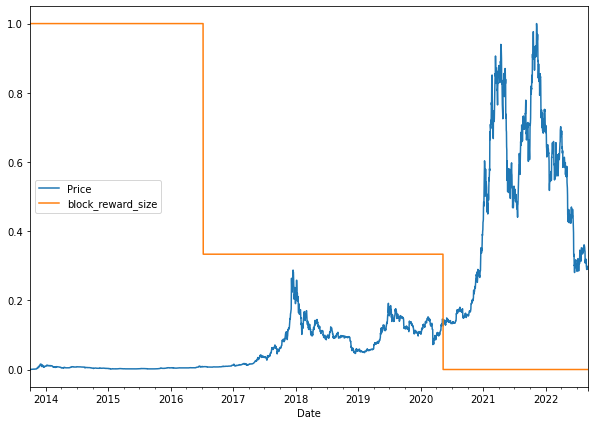

In [194]:
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices[["Price", "block_reward_size"]]), # we need to scale the data first
                                     columns=bitcoin_prices.columns,
                                     index=bitcoin_prices.index)
scaled_price_block_df.plot(figsize=(10, 7));


## Making a windowed dataset with pandas

> Previously, we used some custom made functions to window our `univariate` time series. However, since we've just added another (`block_reward_size`) to our dataset, these functions won't work.

> we can use the `.DataFrame.shift()` method to create a `windowed multivariate time series`. The `shift()` method offsets an index by a specified number of periods.

* Link -> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

### Setup dataset hyperparameters

In [195]:
HORIZON = 1
WINDOW_SIZE = 7

In [196]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward_size,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


### Dropping the `NaN` values from the dataFrame.

We'll also remove the `NaN` values using pandas [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method, this equivalent to starting our windowing function at `sample 0 (the first sample) + WINDOW_SIZE`.

> Now that we've got a windowed dataset, let's separate features (`X`) from labels (`y`).

> Remember in our windowed dataset, we're trying to use the previous `WINDOW_SIZE` steps to predict `HORIZON` steps.

```
Window for a week (7) to predict a horizon of 1 (multivariate time series)
WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

* `X` -> A week(7) worth of prices of bitcoin `+` the block reward at that time.
* `y` -> The label or the price of the bitcoin to be predicted by the model, which is trained on `X`.



In [197]:
X= bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype('float32')
y= bitcoin_prices_windowed.dropna()["Price"].astype('float32')

In [198]:
X.head()

,block_reward_size,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [199]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [200]:
X.shape

(3255, 8)

In [201]:
y.shape

(3255,)

### Splitting the dataset into train, test split

In [202]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(X, y)

In [203]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2604, 651, 2604, 651)

In [204]:
train_windows.shape, test_windows.shape, train_labels.shape, test_labels.shape

((2604, 8), (651, 8), (2604,), (651,))

## `Model: 6` Multivariate Dense Model

### Steps:


* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs

In [205]:
WINDOWS_SIZE, HORIZON

(7, 1)

In [206]:
inputs= layers.Input(shape=(WINDOWS_SIZE+ 1, ), dtype="float32",  name="model_6_inputs")
x= layers.Dense(128, activation='relu')(inputs)
outputs= layers.Dense(HORIZON, activation="linear")(x)

model_6= tf.keras.Model(inputs, outputs, name="model_6_multivariate_dense")

In [207]:
model_6.summary()

Model: "model_6_multivariate_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_6_inputs (InputLayer)  [(None, 8)]              0         
                                                                 
 dense_7 (Dense)             (None, 128)               1152      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [208]:
model_6.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_model_6= model_6.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name='model_6_multivariate_dense', save_path='model_experiments')])

Epoch 1/100
21/21 [==============================] - 1s 27ms/step - loss: 430.6350 - mae: 430.6350 - mse: 694587.2500 - val_loss: 2016.2081 - val_mae: 2016.2081 - val_mse: 7165195.5000
Epoch 2/100
21/21 [==============================] - 0s 24ms/step - loss: 207.8822 - mae: 207.8822 - mse: 190338.6250 - val_loss: 1761.5416 - val_mae: 1761.5416 - val_mse: 5545631.5000
Epoch 3/100
21/21 [==============================] - 0s 25ms/step - loss: 176.1915 - mae: 176.1915 - mse: 144427.2344 - val_loss: 1633.3395 - val_mae: 1633.3395 - val_mse: 4645861.0000
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 163.4693 - mae: 163.4693 - mse: 124106.5703 - val_loss: 1797.0046 - val_mae: 1797.0046 - val_mse: 5709630.0000
Epoch 5/100
21/21 [==============================] - 0s 21ms/step - loss: 162.7240 - mae: 162.7240 - mse: 120122.4844 - val_loss: 1454.3643 - val_mae: 1454.3643 - val_mse: 3885850.7500
Epoch 6/100
21/21 [==============================] - 1s 38ms/step - loss: 14

In [209]:
model_6.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1175.3180 - mae: 1175.3180 - mse: 2708206.5000


[1175.3179931640625, 1175.3179931640625, 2708206.5]

In [210]:
model_6_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_6_multivariate_dense')

In [211]:
model_6_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1154.4937 - mae: 1154.4937 - mse: 2622936.0000


[1154.49365234375, 1154.49365234375, 2622936.0]

In [221]:
model_6_preds= make_preds(model_6_checkpoint, test_windows)
model_6_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([18373.336, 19040.092, 18823.219, 17284.916, 17017.723],
      dtype=float32)>

In [222]:
model_6_preds.shape

TensorShape([651])

In [223]:
tf.squeeze(test_labels).shape

TensorShape([651])

In [224]:
model_6_preds.dtype

tf.float32

In [225]:
test_labels.dtype

dtype('float32')

In [226]:
model_6_results= evaluate_preds(tf.squeeze(test_labels), model_6_preds)
model_6_results

{'mae': 1154.4935,
 'mse': 2622936.2,
 'rmse': 1619.5482,
 'mape': 2.9020348,
 'mase': 1.0092905}

In [227]:
model_1_results

{'mae': 1150.661884361943,
 'mse': 2617045.4913400547,
 'rmse': 1617.7284974123609,
 'mape': 2.892959959545304,
 'mase': 1.00594077054125}

In [228]:
naive_results

{'mae': 1141.5067610828223,
 'mse': 2592967.393714534,
 'rmse': 1610.269354398367,
 'mape': 2.8639307796373665,
 'mase': 0.9984741472055336}

## `Model: 6_1` Exercise to improve `model_6`

* Link -> https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/#improving-a-model



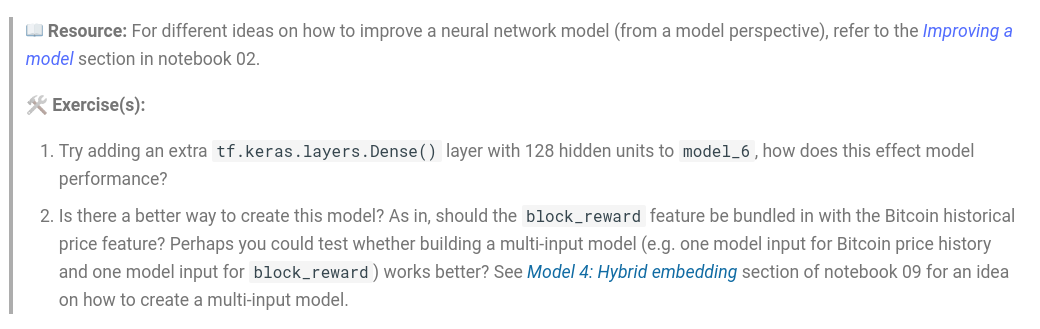

In [229]:
inputs= layers.Input(shape=(WINDOWS_SIZE+ 1, ), dtype="float32",  name="model_6_1_inputs")
x= layers.Dense(512, activation='relu')(inputs)
outputs= layers.Dense(HORIZON, activation="linear")(x)

model_6_1= tf.keras.Model(inputs, outputs, name="model_6_1_multivariate_dense")

model_6_1.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_model_6_1= model_6_1.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name='model_6_1_multivariate_dense', save_path='model_experiments')])

Epoch 1/100
21/21 [==============================] - 2s 49ms/step - loss: 867.6196 - mae: 867.6196 - mse: 2852580.2500 - val_loss: 3061.5354 - val_mae: 3061.5354 - val_mse: 14583901.0000
Epoch 2/100
21/21 [==============================] - 1s 49ms/step - loss: 294.6767 - mae: 294.6767 - mse: 319320.4062 - val_loss: 2374.1401 - val_mae: 2374.1401 - val_mse: 9664718.0000
Epoch 3/100
21/21 [==============================] - 1s 37ms/step - loss: 218.3001 - mae: 218.3001 - mse: 201145.1875 - val_loss: 2199.4885 - val_mae: 2199.4885 - val_mse: 8407062.0000
Epoch 4/100
21/21 [==============================] - 0s 21ms/step - loss: 202.2032 - mae: 202.2032 - mse: 182194.7656 - val_loss: 1820.7001 - val_mae: 1820.7001 - val_mse: 5913155.0000
Epoch 5/100
21/21 [==============================] - 0s 21ms/step - loss: 181.9075 - mae: 181.9075 - mse: 151708.4531 - val_loss: 1682.6522 - val_mae: 1682.6522 - val_mse: 5044084.5000
Epoch 6/100
21/21 [==============================] - 1s 67ms/step - loss:

In [230]:
model_6_1.summary()

Model: "model_6_1_multivariate_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_6_1_inputs (InputLaye  [(None, 8)]              0         
 r)                                                              
                                                                 
 dense_9 (Dense)             (None, 512)               4608      
                                                                 
 dense_10 (Dense)            (None, 1)                 513       
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [231]:
model_6_1.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1144.9768 - mae: 1144.9768 - mse: 2603993.0000


[1144.976806640625, 1144.976806640625, 2603993.0]

In [237]:
model_6_1_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_6_1_multivariate_dense')

In [238]:
model_6_1_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1144.9768 - mae: 1144.9768 - mse: 2603993.0000


[1144.976806640625, 1144.976806640625, 2603993.0]

In [239]:
model_6_1_preds= make_preds(model_6_1_checkpoint, test_windows)
model_6_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([18352.34 , 19048.805, 18771.438, 17273.871, 17040.355],
      dtype=float32)>

In [240]:
model_6_1_results= evaluate_preds(test_labels, model_6_1_preds)
model_6_1_results

{'mae': 1144.9767,
 'mse': 2603992.8,
 'rmse': 1613.6892,
 'mape': 2.879044,
 'mase': nan}

In [241]:
model_6_results

{'mae': 1154.4935,
 'mse': 2622936.2,
 'rmse': 1619.5482,
 'mape': 2.9020348,
 'mase': 1.0092905}

## `Model: 6_2` Exercise to improve `model_6`

* Link -> https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/#improving-a-model



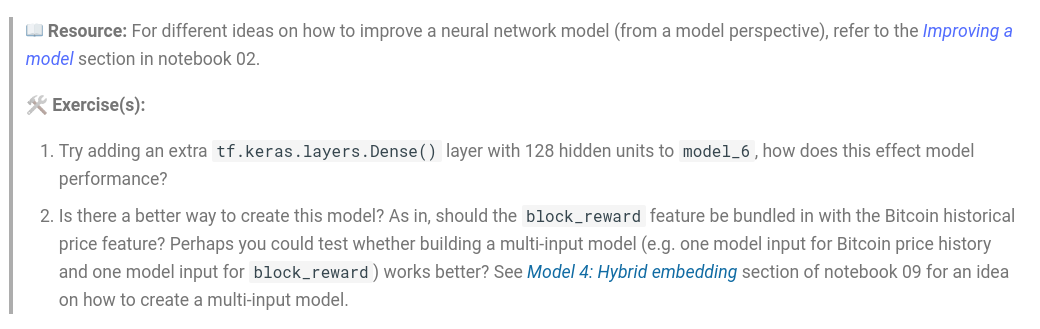

In [242]:
inputs= layers.Input(shape=(WINDOWS_SIZE+ 1, ), dtype="float32",  name="model_6_2_inputs")
x= layers.Dense(512, activation='relu')(inputs)
x= layers.Dense(256, activation='relu')(x)
outputs= layers.Dense(HORIZON, activation="linear")(x)

model_6_2= tf.keras.Model(inputs, outputs, name="model_6_2_multivariate_dense")

model_6_2.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_model_6_2= model_6_2.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name='model_6_2_multivariate_dense', save_path='model_experiments')])

Epoch 1/100
21/21 [==============================] - 1s 42ms/step - loss: 579.8685 - mae: 579.8685 - mse: 1838140.1250 - val_loss: 1768.4229 - val_mae: 1768.4229 - val_mse: 5587176.0000
Epoch 2/100
21/21 [==============================] - 1s 31ms/step - loss: 171.1646 - mae: 171.1646 - mse: 130261.0781 - val_loss: 1370.3865 - val_mae: 1370.3865 - val_mse: 3368926.5000
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 193.2272 - mae: 193.2272 - mse: 133957.6562 - val_loss: 1962.3923 - val_mae: 1962.3923 - val_mse: 5972046.5000
Epoch 4/100
21/21 [==============================] - 1s 31ms/step - loss: 169.6704 - mae: 169.6704 - mse: 112498.6562 - val_loss: 1316.5806 - val_mae: 1316.5806 - val_mse: 3130017.5000
Epoch 5/100
21/21 [==============================] - 1s 50ms/step - loss: 135.4037 - mae: 135.4037 - mse: 90658.4922 - val_loss: 1268.8542 - val_mae: 1268.8542 - val_mse: 3012843.2500
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 135

In [243]:
model_6_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1157.4611 - mae: 1157.4611 - mse: 2625443.2500


[1157.4610595703125, 1157.4610595703125, 2625443.25]

In [244]:
model_6_2_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_6_2_multivariate_dense')

In [245]:
model_6_2_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1149.0192 - mae: 1149.0192 - mse: 2609935.2500


[1149.0191650390625, 1149.0191650390625, 2609935.25]

In [246]:
model_6_2_preds= make_preds(model_6_2_checkpoint, test_windows)
model_6_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([18368.623, 19096.807, 18783.861, 17261.814, 17014.21 ],
      dtype=float32)>

In [247]:
model_6_2_results= evaluate_preds(test_labels, model_6_2_preds)
model_6_2_results

{'mae': 1149.0192,
 'mse': 2609934.8,
 'rmse': 1615.5293,
 'mape': 2.8885744,
 'mase': nan}

In [248]:
model_6_1_results

{'mae': 1144.9767,
 'mse': 2603992.8,
 'rmse': 1613.6892,
 'mape': 2.879044,
 'mase': nan}

In [249]:
model_6_results

{'mae': 1154.4935,
 'mse': 2622936.2,
 'rmse': 1619.5482,
 'mape': 2.9020348,
 'mase': 1.0092905}

## `Model: 6_3` Exercise to improve `model_6`

* Link -> https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/#improving-a-model



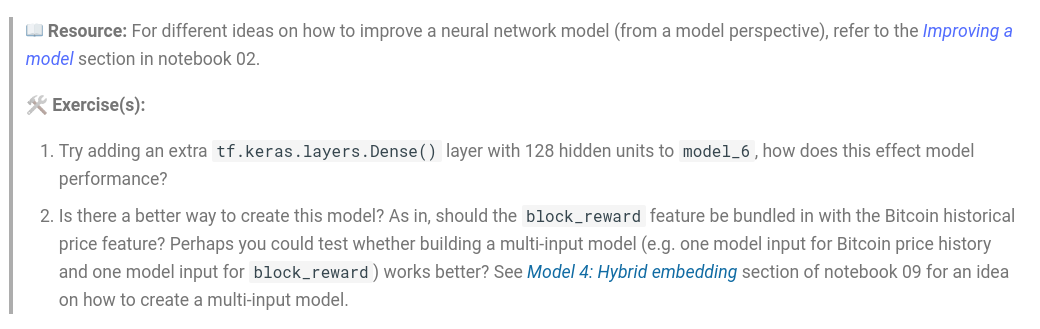

In [250]:
inputs= layers.Input(shape=(WINDOWS_SIZE+ 1, ), dtype="float32",  name="model_6_3_inputs")
x= layers.Dense(512, activation='relu')(inputs)
x= layers.Dense(512, activation='relu')(x)
outputs= layers.Dense(HORIZON, activation="linear")(x)

model_6_3= tf.keras.Model(inputs, outputs, name="model_6_3_multivariate_dense")

model_6_3.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_model_6_3= model_6_3.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name='model_6_3_multivariate_dense', save_path='model_experiments')])

Epoch 1/100
21/21 [==============================] - 2s 61ms/step - loss: 648.9855 - mae: 648.9855 - mse: 2016000.7500 - val_loss: 3544.1650 - val_mae: 3544.1650 - val_mse: 18928300.0000
Epoch 2/100
21/21 [==============================] - 1s 46ms/step - loss: 218.2199 - mae: 218.2199 - mse: 192834.1562 - val_loss: 2051.2593 - val_mae: 2051.2593 - val_mse: 7107720.0000
Epoch 3/100
21/21 [==============================] - 1s 54ms/step - loss: 159.2479 - mae: 159.2479 - mse: 122967.7656 - val_loss: 1965.0422 - val_mae: 1965.0422 - val_mse: 5987060.0000
Epoch 4/100
21/21 [==============================] - 1s 33ms/step - loss: 152.5791 - mae: 152.5791 - mse: 105586.7031 - val_loss: 1318.4741 - val_mae: 1318.4741 - val_mse: 3152145.0000
Epoch 5/100
21/21 [==============================] - 0s 9ms/step - loss: 140.9470 - mae: 140.9470 - mse: 94463.2188 - val_loss: 1363.0049 - val_mae: 1363.0049 - val_mse: 3306146.5000
Epoch 6/100
21/21 [==============================] - 1s 34ms/step - loss: 1

In [251]:
model_6_3.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1169.7377 - mae: 1169.7377 - mse: 2662297.0000


[1169.7376708984375, 1169.7376708984375, 2662297.0]

In [252]:
model_6_3_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_6_3_multivariate_dense')

In [253]:
model_6_3_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1148.9465 - mae: 1148.9465 - mse: 2618907.5000


[1148.946533203125, 1148.946533203125, 2618907.5]

In [255]:
model_6_3_preds= make_preds(model_6_3_checkpoint, test_windows)
model_6_3_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([18361.988, 19077.592, 18805.674, 17270.893, 17014.604],
      dtype=float32)>

In [256]:
model_6_3_results= evaluate_preds(test_labels, model_6_3_preds)
model_6_3_results

{'mae': 1148.9462,
 'mse': 2618907.2,
 'rmse': 1618.3038,
 'mape': 2.8907866,
 'mase': nan}

In [257]:
model_6_2_results

{'mae': 1149.0192,
 'mse': 2609934.8,
 'rmse': 1615.5293,
 'mape': 2.8885744,
 'mase': nan}

In [258]:
model_6_1_results

{'mae': 1144.9767,
 'mse': 2603992.8,
 'rmse': 1613.6892,
 'mape': 2.879044,
 'mase': nan}

In [259]:
model_6_results

{'mae': 1154.4935,
 'mse': 2622936.2,
 'rmse': 1619.5482,
 'mape': 2.9020348,
 'mase': 1.0092905}

## `Model: 6_4` Exercise to improve `model_6`

* Link -> https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/#improving-a-model


### uisng `SGD()` optimizer was giving me this error,

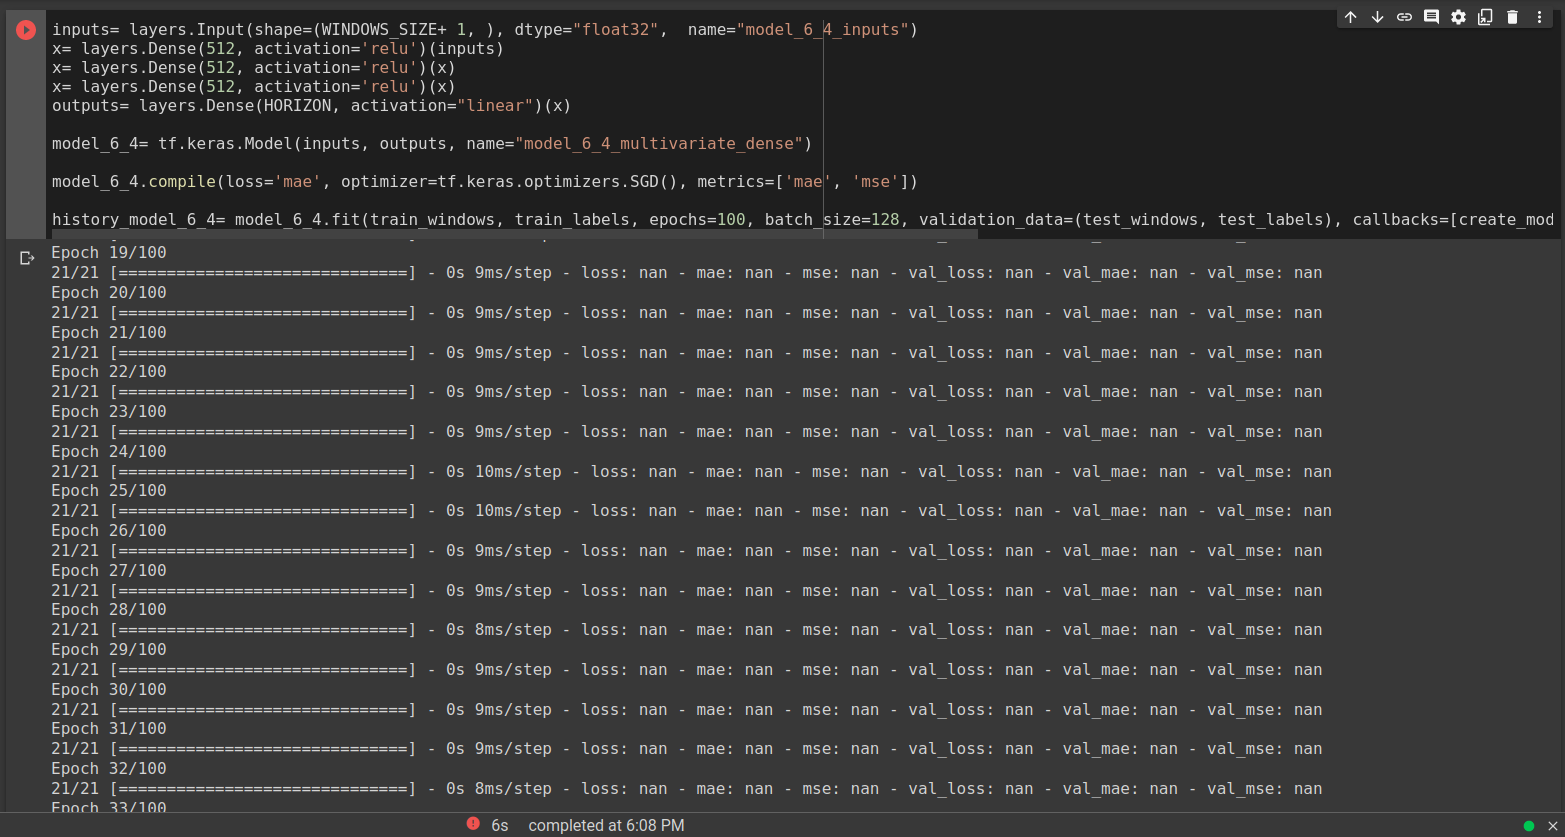


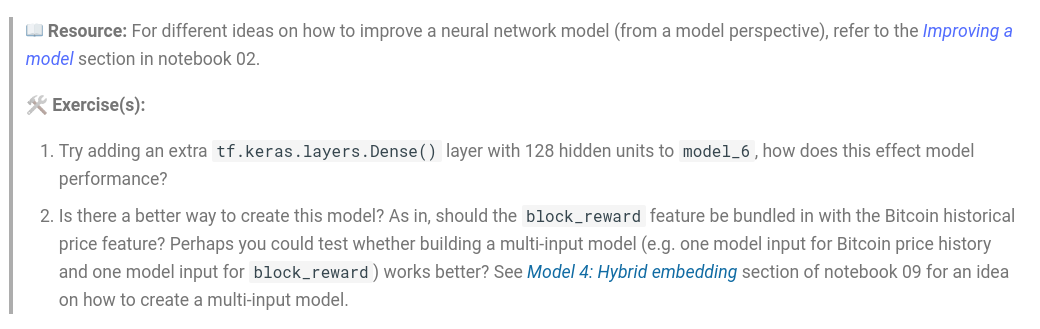

In [266]:
inputs= layers.Input(shape=(WINDOWS_SIZE+ 1, ), dtype="float32",  name="model_6_4_inputs")
x= layers.Dense(512, activation='relu')(inputs)
x= layers.Dense(512, activation='relu')(x)
x= layers.Dense(512, activation='relu')(x)
outputs= layers.Dense(HORIZON, activation="linear")(x)

model_6_4= tf.keras.Model(inputs, outputs, name="model_6_4_multivariate_dense")

model_6_4.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_model_6_4= model_6_4.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name='model_6_4_multivariate_dense', save_path='model_experiments')])

Epoch 1/100
21/21 [==============================] - 2s 71ms/step - loss: 904.2217 - mae: 904.2217 - mse: 3735088.0000 - val_loss: 3932.7361 - val_mae: 3932.7361 - val_mse: 22669964.0000
Epoch 2/100
21/21 [==============================] - 1s 44ms/step - loss: 239.5969 - mae: 239.5969 - mse: 232296.2031 - val_loss: 1701.7091 - val_mae: 1701.7091 - val_mse: 5051489.0000
Epoch 3/100
21/21 [==============================] - 0s 14ms/step - loss: 177.0045 - mae: 177.0045 - mse: 139765.3594 - val_loss: 1767.8685 - val_mae: 1767.8685 - val_mse: 5109247.0000
Epoch 4/100
21/21 [==============================] - 1s 43ms/step - loss: 162.8237 - mae: 162.8237 - mse: 112323.7734 - val_loss: 1355.4468 - val_mae: 1355.4468 - val_mse: 3302521.5000
Epoch 5/100
21/21 [==============================] - 1s 46ms/step - loss: 147.7750 - mae: 147.7750 - mse: 103269.6250 - val_loss: 1317.5933 - val_mae: 1317.5933 - val_mse: 3154727.2500
Epoch 6/100
21/21 [==============================] - 0s 15ms/step - loss:

In [267]:
model_6_4.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1698.5618 - mae: 1698.5618 - mse: 4763430.5000


[1698.561767578125, 1698.561767578125, 4763430.5]

In [268]:
model_6_4_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_6_4_multivariate_dense')

In [270]:
model_6_4_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 4ms/step - loss: 1145.0863 - mae: 1145.0863 - mse: 2607725.5000


[1145.0863037109375, 1145.0863037109375, 2607725.5]

In [271]:
model_6_4_preds= make_preds(model_6_4_checkpoint, test_windows)
model_6_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([18354.164, 19066.361, 18812.72 , 17283.975, 17051.8  ],
      dtype=float32)>

In [272]:
model_6_4_results= evaluate_preds(test_labels, model_6_4_preds)
model_6_4_results

{'mae': 1145.0863,
 'mse': 2607725.8,
 'rmse': 1614.8455,
 'mape': 2.87852,
 'mase': nan}

In [273]:
model_6_3_results

{'mae': 1148.9462,
 'mse': 2618907.2,
 'rmse': 1618.3038,
 'mape': 2.8907866,
 'mase': nan}

In [274]:
model_6_2_results

{'mae': 1149.0192,
 'mse': 2609934.8,
 'rmse': 1615.5293,
 'mape': 2.8885744,
 'mase': nan}

In [275]:
model_6_1_results

{'mae': 1144.9767,
 'mse': 2603992.8,
 'rmse': 1613.6892,
 'mape': 2.879044,
 'mase': nan}

In [276]:
model_6_results

{'mae': 1154.4935,
 'mse': 2622936.2,
 'rmse': 1619.5482,
 'mape': 2.9020348,
 'mase': 1.0092905}

## `Model 7`: N-BEATS algorithm

Time to step things up a notch.

So far we've tried a bunch of smaller models, models with only a couple of layers.

But one of the best ways to improve a model's performance is to increase the number of layers in it.

That's exactly what the [N-BEATS (Neural Basis Expansion Analysis for Interpretable Time Series Forecasting) algorithm](https://arxiv.org/pdf/1905.10437.pdf) does.

The N-BEATS algorithm focuses on univariate time series problems and achieved state-of-the-art performance in the winner of the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) (a forecasting competition).

For our next modelling experiment we're going to be replicating the **generic architecture** of the N-BEATS algorithm (see [section 3.3 of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)).

We're not going to go through all of the details in the paper, instead we're going to focus on:
1. Replicating the model architecture in [Figure 1 of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf) 

![figure 1 from N-BBEATS paper, the algorithm we're going to build](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-figure-1-nbeats-paper-annotated.png)
*N-BEATS algorithm we're going to replicate with TensorFlow with window (input) and horizon (output) annotations.*

2. Using the same hyperparameters as the paper which can be found in [Appendix D of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)

Doing this will give us an opportunity to practice:
* Creating a custom layer for the `NBeatsBlock` by subclassing [`tf.keras.layers.Layer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)
  * Creating a custom layer is helpful for when TensorFlow doesn't already have an existing implementation of a layer or if you'd like to make a layer configuration repeat a number of times (e.g. like a stack of N-BEATS blocks)
* Implementing a custom architecture using the Functional API 
* Finding a paper related to our problem and seeing how it goes 

> As we can see in the paper, the authors state “N-BEATS is implemented and trained in TensorFlow”, that's what we'll be doing too!


### Creating an NBeatsBlock Custom layer

In [277]:
class NBeatsBlock(tf.keras.layers.Layer):
  # The Constructor of the class.
  def __init__(self, input_size: int, theta_size: int, horizon: int, n_neurons: int, n_layers: int,  **kwargs):
    super().__init__(**kwargs)
    self.input_size= input_size
    self.theta_size= theta_size
    self.horizon= horizon
    self.n_neurons= n_neurons
    self.n_layers= n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden= [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]

    # Output of block is a theta layer with linear activation
    self.theta_layer= tf.keras.layers.Dense(theta_size, activation='linear', name='theta_layer')

  # the `call method` is what runs when the layer is called 
  def call(self, inputs):
    x= inputs
    for layer in self.hidden: # pass inputs through each hidden layer 
      x=layer(x)

    theta= self.theta_layer(x)

    # Output the backcast and forecast from theta
    backcast, forecast= theta[:, :self.input_size], theta[:, -self.horizon]
    return backcast, forecast

Setting up the `NBeatsBlock` custom layer we see: 
* The class inherits from `tf.keras.layers.Layer` (this gives it all of the methods assosciated with `tf.keras.layers.Layer`)
* The constructor (`def __init__(...)`) takes all of the layer hyperparameters as well as the `**kwargs` argument
  * The `**kwargs` argument takes care of all of the hyperparameters which aren't mentioned in the constructor such as, `input_shape`, `trainable` and `name`
* In the constructor, the block architecture layers are created:
  * The hidden layers are created as a stack of fully connected with `n_nuerons` hidden units layers with ReLU activation
  * The theta layer uses `theta_size` hidden units as well as linear activation
* The `call()` method is what is run when the layer is called:
  * It first passes the inputs (the historical Bitcoin data) through each of the hidden layers (a stack of fully connected layers with ReLU activation)
  * After the inputs have been through each of the fully connected layers, they get passed through the theta layer where the backcast (backwards predictions, shape: `input_size`) and forecast (forward predictions, shape: `horizon`) are returned

![code mapping to image of N-BEATS basic block](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-nbeats-basic-block-replication-with-tensorflow-layer-subclassing.png)
*Using TensorFlow layer subclassing to replicate the N-BEATS basic block. See section 3.1 of N-BEATS paper for details.*

Let's see our block replica in action by together by creating a toy version of `NBeatsBlock`.

> 📖  **Resource:** Much of the creation of the time series materials (the ones you're going through now), including replicating the N-BEATS algorithm were streamed live on Twitch. If you'd like to see replays of how the algorithm was replicated, check out the [*Time series research and TensorFlow course material creation playlist*](https://youtube.com/playlist?list=PL8IpyNZ21vUSCM7nRAuS-hW_E-sgwdmaI) on the Daniel Bourke arXiv YouTube channel.

### Set up dummy NBeatsBlock layer to represent inputs and outputs

In [278]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [279]:
dummy_nbeats_block_layer

### Create dummy inputs (have to be same size as input_size)

In [280]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

### Pass dummy inputs to dummy NBeatsBlock layer

In [281]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.6111352   0.01227489 -0.18495327 -0.4236989  -0.19322634  0.448084
  0.30536503]
Forecast: 0.05383297801017761
